# Unsupervised ML (Clustering)



In [163]:
#Basic Data Handling and Operations
import numpy as np
import pandas as pd

#Importing Machine Learning - General libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler


#Importing Regression Libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#Importing Clustering Libraries
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

#Import Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Advanced library
# XGBoost for gradient boosting (useful for both regression and classification)
import xgboost as xgb


import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing dataset

In [164]:
crime = pd.read_csv("C:\\Users\\gupta\\Downloads\\India_Crime - Copy\\India_Crime - Copy\\01_District_wise_crimes_committed_IPC_2001_2012.csv")

In [165]:
# Drop rows where the 'DISTRICT' column value is 'TOTAL'
crimes= crime[crime['DISTRICT'] != 'TOTAL']

# Display the first few rows of the filtered DataFrame to confirm 'TOTAL' rows are dropped
print(crimes.head())


         STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH       ADILABAD  2001     101                 60   
1  ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2  ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3  ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4  ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         17    50               0   
1                                          1    23               0   
2                                          2    27               0   
3                                          1    20               0   
4                                          1    23               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  ...  ARSON  HURT/GREVIOUS HURT  \
0          50                      46  ...     30                1131   
1          23     

In [60]:
crimes.head(5)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Area Type
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,NaN
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,NaN
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,NaN
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,NaN
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,NaN


In [61]:
crimes.tail(10)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Area Type
9005,DELHI UT,NORTH-WEST,2012,60,37,8,64,0,64,357,...,166,12,19,14,212,0,9,1253,4542,NaN
9006,DELHI UT,OUTER,2012,96,60,15,67,0,67,572,...,224,15,79,18,244,0,90,2006,6344,NaN
9007,DELHI UT,SOUTH,2012,39,19,3,70,0,70,245,...,101,17,59,36,68,0,25,1651,5045,NaN
9008,DELHI UT,SOUTH-EAST,2012,46,69,6,116,0,116,538,...,252,11,160,43,123,0,218,2004,7040,NaN
9009,DELHI UT,SOUTH-WEST,2012,47,48,6,87,0,87,399,...,131,18,69,21,207,0,4,1387,4085,NaN
9010,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,6,NaN
9011,DELHI UT,WEST,2012,52,37,10,79,0,79,454,...,227,18,53,6,327,0,292,1144,5558,NaN
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,0,1,0,1,0,0,32,60,NaN
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,186,0,2,0,1,0,44,392,787,NaN
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,632,0,7,2,5,0,219,1668,3494,NaN


In [62]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8609 entries, 0 to 9015
Data columns (total 34 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             8609 non-null   object
 1   DISTRICT                                             8609 non-null   object
 2   YEAR                                                 8609 non-null   int64 
 3   MURDER                                               8609 non-null   int64 
 4   ATTEMPT TO MURDER                                    8609 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            8609 non-null   int64 
 6   RAPE                                                 8609 non-null   int64 
 7   CUSTODIAL RAPE                                       8609 non-null   int64 
 8   OTHER RAPE                                           8609 non-null   int64 
 9   KI

In [63]:
# Filtering the DataFrame to include only the required columns
crime_filtered = crimes[['STATE/UT', 'DISTRICT', 'YEAR', 'TOTAL IPC CRIMES']]

In [64]:
# For clustering, we'll only use the 'TOTAL IPC CRIMES' data
# However, it's important to note clustering is based purely on numerical data
X = crime_filtered[['TOTAL IPC CRIMES']].values

In [65]:
# Using KMeans to cluster the data into 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
crime_filtered['Cluster'] = kmeans.fit_predict(X)

In [66]:
# Let's check the centroids to label our clusters
centroids = kmeans.cluster_centers_.flatten()

In [67]:
# Labeling clusters based on their centroids, assuming higher crime rates indicate more sensitivity
labels = ['Peaceful Areas', 'Moderate Areas', 'Sensitive Areas']
crime_filtered['Area Type'] = pd.cut(crime_filtered['Cluster'], bins=np.linspace(-0.5, 2.5, 4), labels=labels, include_lowest=True)

In [68]:
# Dropping the numerical cluster column as it's no longer needed
crime_filtered.drop('Cluster', axis=1, inplace=True)

In [69]:
# Let's see how the DataFrame looks
print(crime_filtered.head())

         STATE/UT       DISTRICT  YEAR  TOTAL IPC CRIMES       Area Type
0  ANDHRA PRADESH       ADILABAD  2001              4154  Peaceful Areas
1  ANDHRA PRADESH      ANANTAPUR  2001              4125  Moderate Areas
2  ANDHRA PRADESH       CHITTOOR  2001              5818  Peaceful Areas
3  ANDHRA PRADESH       CUDDAPAH  2001              3140  Moderate Areas
4  ANDHRA PRADESH  EAST GODAVARI  2001              6507  Peaceful Areas


In [70]:
# You might want to see the distribution of 'Area Type'
print(crime_filtered['Area Type'].value_counts())

Area Type
Moderate Areas     6755
Peaceful Areas     1815
Sensitive Areas      39
Name: count, dtype: int64


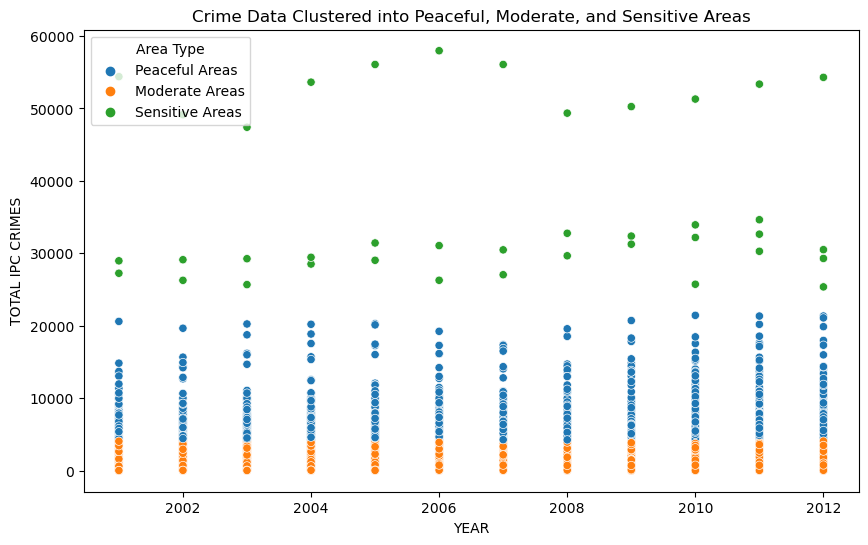

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=crime_filtered, x='YEAR', y='TOTAL IPC CRIMES', hue='Area Type')
plt.title('Crime Data Clustered into Peaceful, Moderate, and Sensitive Areas')
plt.show()

Above figure shows yearwise peaceful area, moderate area and sensitive area clusters.

**Second Method**

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
# Let's focus on 'STATE/UT', 'DISTRICT', 'YEAR', 'TOTAL IPC CRIMES'

# We will use only 'TOTAL IPC CRIMES' for clustering
X = crimes[['TOTAL IPC CRIMES']].values

In [74]:
# It's a good practice to scale the data, especially for distance-based algorithms like KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [75]:
# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
crimes['Cluster'] = kmeans.fit_predict(X_scaled)

In [76]:
# Optional: You might want to see the distribution of data across clusters
print(crimes['Cluster'].value_counts())

Cluster
1    6755
0    1815
2      39
Name: count, dtype: int64


Label the clusters based on their centroids. Lower values might indicate "Peaceful Areas", and higher values might indicate "Sensitive Areas":

In [77]:
# Identify cluster centroids
centroids = kmeans.cluster_centers_.flatten()

In [78]:
# Sort centroids and label clusters accordingly
sorted_centroids = sorted(centroids)
labels = ["Peaceful Areas", "Moderate Areas", "Sensitive Areas"]
centroid_labels = {centroid: label for centroid, label in zip(sorted_centroids, labels)}

In [81]:
# Map the original cluster labels to meaningful labels
crime['Area Type'] = crimes['Cluster'].map(lambda x: centroid_labels[centroids[x]])

**Visualization**

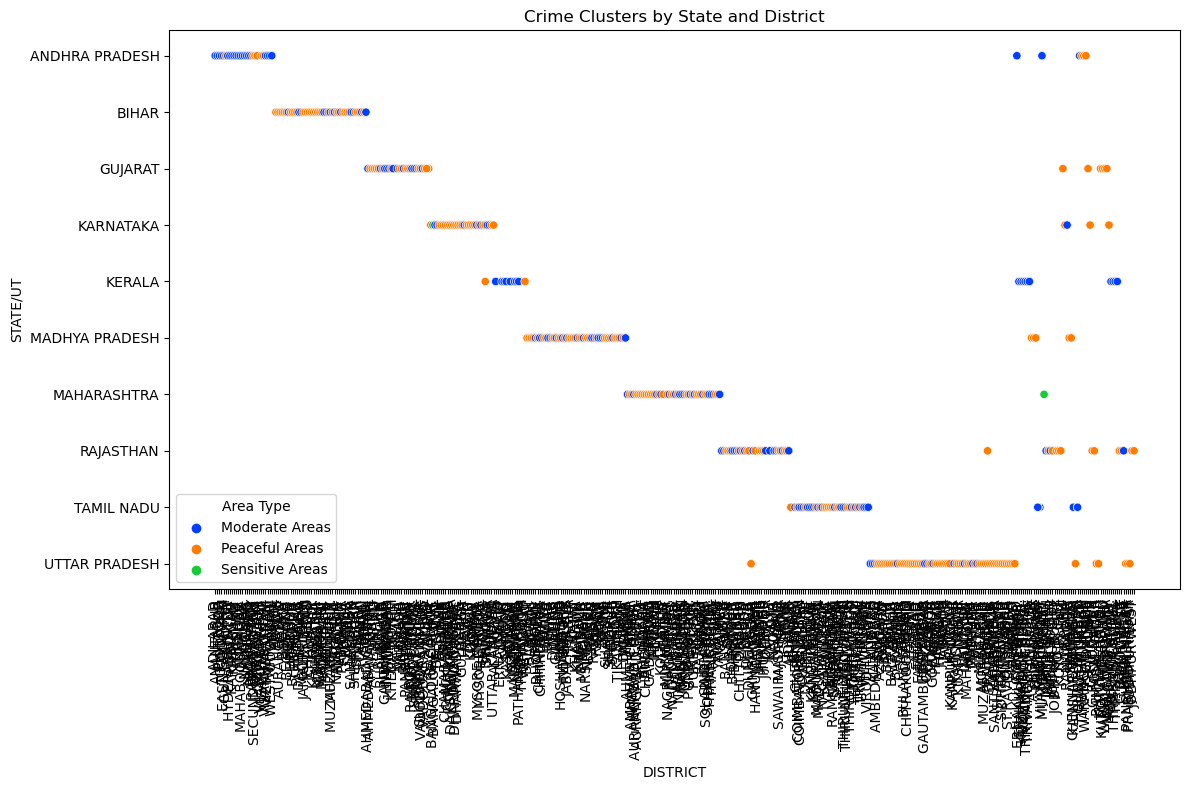

In [83]:
# Since there could be many districts and states, let's visualize the top states with the highest crime counts for clarity
top_states = crime.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().sort_values(ascending=False).head(10).index

# Filter the DataFrame to include only top states for a cleaner visualization
top_states_data = crime[crime['STATE/UT'].isin(top_states)]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_states_data, x='DISTRICT', y='STATE/UT', hue='Area Type', palette='bright')
plt.title('Crime Clusters by State and District')
plt.xticks(rotation=90)  # Rotate district names for better readability
plt.legend(title='Area Type')
plt.tight_layout()
plt.show()


Above graph shows Crime Clusters by State and District. But it doesnt give clear idea of Area type clusters

In [94]:
# Let's prepare the data
data_for_clustering = crimes[['STATE/UT', 'DISTRICT', 'YEAR', 'TOTAL IPC CRIMES']].copy()
# Since clustering will be based on 'TOTAL IPC CRIMES', let's scale this feature
# Scaling is optional here as we have only one feature, but it's generally a good practice
scaler = StandardScaler()
data_for_clustering['TOTAL IPC CRIMES Scaled'] = scaler.fit_transform(data_for_clustering[['TOTAL IPC CRIMES']])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data_for_clustering['Cluster'] = kmeans.fit_predict(data_for_clustering[['TOTAL IPC CRIMES Scaled']])

# We will now label our clusters as requested
# First, find out which cluster numbers correspond to high, medium, and low crime rates
centroids_scaled = kmeans.cluster_centers_.flatten()
order = centroids_scaled.argsort()  # This gives us the order from lowest to highest
labels_map = {order[0]: 'Peaceful Areas', order[1]: 'Moderate Areas', order[2]: 'Sensitive Areas'}
data_for_clustering['Area Type'] = data_for_clustering['Cluster'].map(labels_map)
# Drop the 'TOTAL IPC CRIMES Scaled' and 'Cluster' as they are no longer needed for the analysis
data_for_clustering.drop(['TOTAL IPC CRIMES Scaled', 'Cluster'], axis=1, inplace=True)

# Showing the DataFrame sorted by 'Area Type' for clearer analysis
sorted_data = data_for_clustering.sort_values(by=['Area Type', 'STATE/UT', 'DISTRICT'])

# Display or save the sorted data
print(sorted_data.head(50))  # Adjust the number to display as needed

# If you wish to save this data to a CSV for easier viewing or sharing
sorted_data.to_csv('clustered_crime_data.csv', index=False)

# The result is a DataFrame where each district is categorized into one of the three area types


            STATE/UT   DISTRICT  YEAR  TOTAL IPC CRIMES       Area Type
0     ANDHRA PRADESH   ADILABAD  2001              4154  Moderate Areas
716   ANDHRA PRADESH   ADILABAD  2002              4675  Moderate Areas
1435  ANDHRA PRADESH   ADILABAD  2003              4881  Moderate Areas
2163  ANDHRA PRADESH   ADILABAD  2004              5011  Moderate Areas
2892  ANDHRA PRADESH   ADILABAD  2005              5033  Moderate Areas
3625  ANDHRA PRADESH   ADILABAD  2006              6122  Moderate Areas
4365  ANDHRA PRADESH   ADILABAD  2007              5685  Moderate Areas
5108  ANDHRA PRADESH   ADILABAD  2008              5300  Moderate Areas
5869  ANDHRA PRADESH   ADILABAD  2009              5312  Moderate Areas
6636  ANDHRA PRADESH   ADILABAD  2010              4955  Moderate Areas
7415  ANDHRA PRADESH   ADILABAD  2011              5121  Moderate Areas
8206  ANDHRA PRADESH   ADILABAD  2012              5710  Moderate Areas
717   ANDHRA PRADESH  ANANTAPUR  2002              4467  Moderat

In [95]:
print(sorted_data.tail(50))

         STATE/UT          DISTRICT  YEAR  TOTAL IPC CRIMES        Area Type
687   WEST BENGAL    UTTAR DINAJPUR  2001              1540   Peaceful Areas
1405  WEST BENGAL    UTTAR DINAJPUR  2002              1325   Peaceful Areas
2134  WEST BENGAL    UTTAR DINAJPUR  2003              1327   Peaceful Areas
2863  WEST BENGAL    UTTAR DINAJPUR  2004              1566   Peaceful Areas
3596  WEST BENGAL    UTTAR DINAJPUR  2005              1705   Peaceful Areas
4335  WEST BENGAL    UTTAR DINAJPUR  2006              1981   Peaceful Areas
5078  WEST BENGAL    UTTAR DINAJPUR  2007              2019   Peaceful Areas
5834  WEST BENGAL    UTTAR DINAJPUR  2008              2730   Peaceful Areas
6601  WEST BENGAL    UTTAR DINAJPUR  2009              2923   Peaceful Areas
7380  WEST BENGAL    UTTAR DINAJPUR  2010              3759   Peaceful Areas
8171  WEST BENGAL    UTTAR DINAJPUR  2011              3885   Peaceful Areas
700      DELHI UT    DELHI UT TOTAL  2001             54384  Sensitive Areas

In [96]:
sorted_data

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,Area Type
0,ANDHRA PRADESH,ADILABAD,2001,4154,Moderate Areas
716,ANDHRA PRADESH,ADILABAD,2002,4675,Moderate Areas
1435,ANDHRA PRADESH,ADILABAD,2003,4881,Moderate Areas
2163,ANDHRA PRADESH,ADILABAD,2004,5011,Moderate Areas
2892,ANDHRA PRADESH,ADILABAD,2005,5033,Moderate Areas
...,...,...,...,...,...
6269,MAHARASHTRA,MUMBAI COMMR.,2009,31262,Sensitive Areas
7044,MAHARASHTRA,MUMBAI COMMR.,2010,33932,Sensitive Areas
7829,MAHARASHTRA,MUMBAI COMMR.,2011,32647,Sensitive Areas
8630,MAHARASHTRA,MUMBAI COMMR.,2012,30508,Sensitive Areas


**4.2  Create DataFrame for each cluster that shows data according to the areas.**
**<br>A) For Sensitive Area**

In [97]:
# Filter the DataFrame to include only rows where 'Area Type' is 'Sensitive Areas'
sensitive_areas_df = sorted_data[sorted_data['Area Type'] == 'Sensitive Areas']

# Display the filtered DataFrame
print(sensitive_areas_df)


         STATE/UT          DISTRICT  YEAR  TOTAL IPC CRIMES        Area Type
700      DELHI UT    DELHI UT TOTAL  2001             54384  Sensitive Areas
1418     DELHI UT    DELHI UT TOTAL  2002             49137  Sensitive Areas
2147     DELHI UT    DELHI UT TOTAL  2003             47404  Sensitive Areas
2876     DELHI UT    DELHI UT TOTAL  2004             53623  Sensitive Areas
3609     DELHI UT    DELHI UT TOTAL  2005             56065  Sensitive Areas
4348     DELHI UT    DELHI UT TOTAL  2006             57963  Sensitive Areas
5090     DELHI UT    DELHI UT TOTAL  2007             56065  Sensitive Areas
5849     DELHI UT    DELHI UT TOTAL  2008             49350  Sensitive Areas
6616     DELHI UT    DELHI UT TOTAL  2009             50251  Sensitive Areas
7395     DELHI UT    DELHI UT TOTAL  2010             51292  Sensitive Areas
8186     DELHI UT    DELHI UT TOTAL  2011             53353  Sensitive Areas
8997     DELHI UT    DELHI UT TOTAL  2012             54287  Sensitive Areas

In [98]:
print(sensitive_areas_df[['STATE/UT', 'DISTRICT', 'TOTAL IPC CRIMES']])


         STATE/UT          DISTRICT  TOTAL IPC CRIMES
700      DELHI UT    DELHI UT TOTAL             54384
1418     DELHI UT    DELHI UT TOTAL             49137
2147     DELHI UT    DELHI UT TOTAL             47404
2876     DELHI UT    DELHI UT TOTAL             53623
3609     DELHI UT    DELHI UT TOTAL             56065
4348     DELHI UT    DELHI UT TOTAL             57963
5090     DELHI UT    DELHI UT TOTAL             56065
5849     DELHI UT    DELHI UT TOTAL             49350
6616     DELHI UT    DELHI UT TOTAL             50251
7395     DELHI UT    DELHI UT TOTAL             51292
8186     DELHI UT    DELHI UT TOTAL             53353
8997     DELHI UT    DELHI UT TOTAL             54287
255     KARNATAKA  BANGALORE COMMR.             27254
972     KARNATAKA  BANGALORE COMMR.             29120
1695    KARNATAKA  BANGALORE COMMR.             29260
2423    KARNATAKA  BANGALORE COMMR.             28526
3157    KARNATAKA  BANGALORE COMMR.             29042
3891    KARNATAKA  BANGALORE

**Below States are the unsafe State/UT as it comes under Sensitive Area**

In [99]:
# Get distinct state names from the filtered DataFrame
distinct_states = sensitive_areas_df['STATE/UT'].unique()

# Print the distinct state names
print(distinct_states)

['DELHI UT' 'KARNATAKA' 'KERALA' 'MAHARASHTRA' 'WEST BENGAL']


In [108]:

# Get distinct districts names from the filtered DataFrame
distinct_districts = sensitive_areas_df['DISTRICT'].unique()

# Print the distinct districts names
print(distinct_districts)


['DELHI UT TOTAL' 'BANGALORE COMMR.' 'ERNAKULAM COMMR.' 'ERNAKULAM RURAL'
 'MUMBAI' 'MUMBAI COMMR.' 'KOLKATA']


**Above District are the unsafe districts as it comes in the Sensitive state districts**

**4.2  Create DataFrame for each cluster that shows data according to the areas.**
**<br>B) For Peaceful Area**

In [28]:
# Filter the DataFrame to include only rows where 'Area Type' is 'Sensitive Areas'
peaceful_areas_df = sorted_data[sorted_data['Area Type'] == 'Peaceful Areas']

# Display the filtered DataFrame
print(peaceful_areas_df)

           STATE/UT         DISTRICT  YEAR  TOTAL IPC CRIMES       Area Type
5080  A & N ISLANDS  A and N ISLANDS  2007               807  Peaceful Areas
689   A & N ISLANDS          ANDAMAN  2001               637  Peaceful Areas
1407  A & N ISLANDS          ANDAMAN  2002               580  Peaceful Areas
2136  A & N ISLANDS          ANDAMAN  2003               611  Peaceful Areas
2865  A & N ISLANDS          ANDAMAN  2004               721  Peaceful Areas
...             ...              ...   ...               ...             ...
5834    WEST BENGAL   UTTAR DINAJPUR  2008              2730  Peaceful Areas
6601    WEST BENGAL   UTTAR DINAJPUR  2009              2923  Peaceful Areas
7380    WEST BENGAL   UTTAR DINAJPUR  2010              3759  Peaceful Areas
8171    WEST BENGAL   UTTAR DINAJPUR  2011              3885  Peaceful Areas
8981    WEST BENGAL   UTTAR DINAJPUR  2012              5212  Peaceful Areas

[8772 rows x 5 columns]


In [29]:
print(peaceful_areas_df[['STATE/UT', 'DISTRICT', 'TOTAL IPC CRIMES']])

           STATE/UT         DISTRICT  TOTAL IPC CRIMES
5080  A & N ISLANDS  A and N ISLANDS               807
689   A & N ISLANDS          ANDAMAN               637
1407  A & N ISLANDS          ANDAMAN               580
2136  A & N ISLANDS          ANDAMAN               611
2865  A & N ISLANDS          ANDAMAN               721
...             ...              ...               ...
5834    WEST BENGAL   UTTAR DINAJPUR              2730
6601    WEST BENGAL   UTTAR DINAJPUR              2923
7380    WEST BENGAL   UTTAR DINAJPUR              3759
8171    WEST BENGAL   UTTAR DINAJPUR              3885
8981    WEST BENGAL   UTTAR DINAJPUR              5212

[8772 rows x 3 columns]


**Above States are the safest State/UT as it comes under peaceful area**

In [101]:
# Get distinct state names from the filtered DataFrame
distinctp_states = peaceful_areas_df['STATE/UT'].unique()

# Print the distinct state names
print(distinctp_states)

['A & N ISLANDS' 'ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR'
 'CHANDIGARH' 'CHHATTISGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI UT' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'LAKSHADWEEP' 'MADHYA PRADESH' 'MAHARASHTRA'
 'MANIPUR' 'MEGHALAYA' 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUDUCHERRY' 'PUNJAB'
 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU' 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND'
 'WEST BENGAL']


In [109]:
# Get distinct districts names from the filtered DataFrame
distinctp_districts = peaceful_areas_df['DISTRICT'].unique()

# Print the distinct districts names
print(distinctp_districts)


['A and N ISLANDS' 'ANDAMAN' 'CAR' 'NICOBAR' 'NORTH' 'SOUTH' 'TOTAL'
 'ADILABAD' 'ANANTAPUR' 'CHITTOOR' 'CUDDAPAH' 'CYBERABAD' 'EAST GODAVARI'
 'GUNTAKAL RLY.' 'GUNTUR' 'GUNTUR URBAN' 'HYDERABAD CITY' 'KARIMNAGAR'
 'KHAMMAM' 'KRISHNA' 'KURNOOL' 'MAHABOOBNAGAR' 'MEDAK' 'NALGONDA'
 'NELLORE' 'NIZAMABAD' 'PRAKASHAM' 'RAJAHMUNDRY' 'RANGA REDDY'
 'SECUNDERABAD RLY.' 'SRIKAKULAM' 'TIRUPATHI URBAN' 'VIJAYAWADA'
 'VIJAYAWADA CITY' 'VIJAYAWADA RLY.' 'VISAKHA RURAL' 'VISAKHAPATNAM'
 'VIZIANAGARAM' 'WARANGAL' 'WARANGAL URBAN' 'WEST GODAVARI' 'ANJAW'
 'CHANGLANG' 'DIBANG VALLEY' 'K/KUMEY' 'KAMENG EAST' 'KAMENG WEST' 'LOHIT'
 'PAPUM PARE' 'RURAL' 'SIANG EAST' 'SIANG UPPER' 'SIANG WEST'
 'SUBANSIRI LOWER' 'SUBANSIRI UPPER' 'TAWANG' 'TIRAP'
 'UPPER DIBANG VALLEY' 'BAKSA' 'BARPETA' 'BASKA' 'BIEO' 'BONGAIGAON'
 'C.I.D.' 'CACHAR' 'CHIRANG' 'DARRANG' 'DHEMAJI' 'DHUBRI' 'DIBRUGARH'
 'G.R.P.' 'GOALPARA' 'GOLAGHAT' 'GUWAHATI CITY' 'HAILAKANDI' 'HAMREN'
 'JORHAT' 'KAMRUP' 'KARBI ANGLONG' 'KARIMGANJ' 'KOKRAJH

**Above Districts are the safest districts as these are the districts of peaceful states**

**4.2  Create DataFrame for each cluster that shows data according to the areas.**
**<br>C) For Moderate Area**

In [110]:
# Filter the DataFrame to include only rows where 'Area Type' is 'Moderatee Areas'
moderate_areas_df = sorted_data[sorted_data['Area Type'] == 'Moderate Areas']

# Display the filtered DataFrame
print(moderate_areas_df )

            STATE/UT          DISTRICT  YEAR  TOTAL IPC CRIMES       Area Type
0     ANDHRA PRADESH          ADILABAD  2001              4154  Moderate Areas
716   ANDHRA PRADESH          ADILABAD  2002              4675  Moderate Areas
1435  ANDHRA PRADESH          ADILABAD  2003              4881  Moderate Areas
2163  ANDHRA PRADESH          ADILABAD  2004              5011  Moderate Areas
2892  ANDHRA PRADESH          ADILABAD  2005              5033  Moderate Areas
...              ...               ...   ...               ...             ...
8975     WEST BENGAL  PASCHIM MIDNAPUR  2012              5000  Moderate Areas
7376     WEST BENGAL    PURAB MIDNAPUR  2010              4396  Moderate Areas
8167     WEST BENGAL    PURAB MIDNAPUR  2011              4665  Moderate Areas
8976     WEST BENGAL    PURAB MIDNAPUR  2012              4981  Moderate Areas
8981     WEST BENGAL    UTTAR DINAJPUR  2012              5212  Moderate Areas

[1815 rows x 5 columns]


In [113]:
print(moderate_areas_df [['STATE/UT', 'DISTRICT', 'TOTAL IPC CRIMES']])

            STATE/UT          DISTRICT  TOTAL IPC CRIMES
0     ANDHRA PRADESH          ADILABAD              4154
716   ANDHRA PRADESH          ADILABAD              4675
1435  ANDHRA PRADESH          ADILABAD              4881
2163  ANDHRA PRADESH          ADILABAD              5011
2892  ANDHRA PRADESH          ADILABAD              5033
...              ...               ...               ...
8975     WEST BENGAL  PASCHIM MIDNAPUR              5000
7376     WEST BENGAL    PURAB MIDNAPUR              4396
8167     WEST BENGAL    PURAB MIDNAPUR              4665
8976     WEST BENGAL    PURAB MIDNAPUR              4981
8981     WEST BENGAL    UTTAR DINAJPUR              5212

[1815 rows x 3 columns]


**Above States are the moderate level State/UT as it comes under Moderate Area**

In [114]:
# Get distinct state names from the filtered DataFrame
distinctm_states = moderate_areas_df['STATE/UT'].unique()

# Print the distinct state names
print(distinctm_states)

['ANDHRA PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'DELHI UT' 'GUJARAT'
 'HARYANA' 'JAMMU & KASHMIR' 'JHARKHAND' 'KARNATAKA' 'KERALA'
 'MADHYA PRADESH' 'MAHARASHTRA' 'ODISHA' 'PUDUCHERRY' 'PUNJAB' 'RAJASTHAN'
 'TAMIL NADU' 'UTTAR PRADESH' 'WEST BENGAL']


In [115]:
# Get distinct districts names from the filtered DataFrame
distinctm_districts = moderate_areas_df['DISTRICT'].unique()

# Print the distinct districts names
print(distinctm_districts)

['ADILABAD' 'ANANTAPUR' 'CHITTOOR' 'CUDDAPAH' 'CYBERABAD' 'EAST GODAVARI'
 'GUNTUR' 'GUNTUR URBAN' 'HYDERABAD CITY' 'KARIMNAGAR' 'KHAMMAM' 'KRISHNA'
 'KURNOOL' 'MAHABOOBNAGAR' 'MEDAK' 'NALGONDA' 'NELLORE' 'NIZAMABAD'
 'PRAKASHAM' 'RANGA REDDY' 'SRIKAKULAM' 'VIJAYAWADA' 'VIJAYAWADA CITY'
 'VISAKHAPATNAM' 'VIZIANAGARAM' 'WARANGAL' 'WEST GODAVARI' 'BARPETA'
 'CACHAR' 'DHUBRI' 'GUWAHATI CITY' 'KAMRUP' 'KOKRAJHAR' 'NAGAON' 'BETTIAH'
 'BHAGALPUR' 'DARBHANGA' 'GAYA' 'MADHUBANI' 'MOTIHARI' 'MUZAFFARPUR'
 'NALANDA' 'PATNA' 'ROHTAS' 'SAMASTIPUR' 'SARAN' 'SIWAN' 'VAISHALI'
 'BILASPUR' 'DURG' 'RAIPUR' 'EAST' 'NORTH WEST' 'NORTH-EAST' 'NORTH-WEST'
 'OUTER' 'SOUTH' 'SOUTH WEST' 'SOUTH-EAST' 'SOUTH-WEST' 'WEST'
 'AHMEDABAD COMMR.' 'BHAVNAGAR' 'GANDHINAGAR' 'HIMATNAGAR' 'JAMNAGAR'
 'JUNAGADH' 'KHEDA NORTH' 'KUTCH' 'MEHSANA' 'PALANPUR' 'RAJKOT COMMR.'
 'RAJKOT RURAL' 'SURAT COMMR.' 'VADODARA COMMR.' 'FARIDABAD' 'GURGAON'
 'HISSAR' 'JAMMU' 'DHANBAD' 'RANCHI' 'BANGALORE RURAL' 'BELGAUM' 'BELLARY'
 'BIDAR

In [116]:
# You might want to see the distribution of 'Area Type'
print(sorted_data['Area Type'].value_counts())

Area Type
Peaceful Areas     6755
Moderate Areas     1815
Sensitive Areas      39
Name: count, dtype: int64


# **4.3  "Analyse your clusters and prepare a report that explains all your observations.**

**<br>**
   **<br>**
   **<br>**
   **<br>**
**Above data analysis shows three different clusters of the India according to Total IPC Crimes.**
**<br> These three clusters are partitioned as per number of IPC Crimes. The three clusters are:**
   **<br>1. Sensitive area- As per highest number of total IPC Crimes**
   **<br>2. Peaceful Area- As per the lowest number of total IPC Crimes**
   **<br>3. Moderate Area- As per the moderate number of total IPC Crimes**
   **<br>**
   **<br>**
   **<br>**
   **<br>**

In [119]:
# Assuming sorted_data is your DataFrame and 'Area Type' is one of its columns

# Get the value counts of 'Area Type' and convert it to a DataFrame
area_type_counts_df = sorted_data['Area Type'].value_counts().to_frame()

# Optionally, you might want to reset the index to turn the 'Area Type' values into a column
area_type_counts_df.reset_index(inplace=True)
area_type_counts_df.columns = ['Area Type', 'Counts']

# Display the resulting DataFrame
print(area_type_counts_df)


         Area Type  Counts
0   Peaceful Areas    6755
1   Moderate Areas    1815
2  Sensitive Areas      39


 **<br>Above dataframe shows Total Counts of each clusters**

**States under sensitive Area-** DELHI UT' 'KARNATAKA' 'KERALA' 'MAHARASHTRA' 'WEST BENGAL'
<br>
**<br>Districts under sensitive Area-**'DELHI UT TOTAL' 'BANGALORE COMMR.' 'ERNAKULAM COMMR.' 'ERNAKULAM RURAL'
 'MUMBAI' 'MUMBAI COMMR.' 'KOLKATA'

**States under Peaceful Area-**
<br>'A & N ISLANDS' 'ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR'
 'CHANDIGARH' 'CHHATTISGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI UT' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'LAKSHADWEEP' 'MADHYA PRADESH' 'MAHARASHTRA'
 'MANIPUR' 'MEGHALAYA' 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUDUCHERRY' 'PUNJAB'
 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU' 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND'
 'WEST BENGAL'
 <br>
**<br>Districts under Peaceful Area-** 'A and N ISLANDS' 'ANDAMAN' 'CAR' 'NICOBAR' 'NORTH' 'SOUTH' 'TOTAL'
 'ADILABAD' 'ANANTAPUR' 'CHITTOOR' 'CUDDAPAH' 'CYBERABAD' 'EAST GODAVARI'
 'GUNTAKAL RLY.' 'GUNTUR' 'GUNTUR URBAN' 'HYDERABAD CITY' 'KARIMNAGAR'
 'KHAMMAM' 'KRISHNA' 'KURNOOL' 'MAHABOOBNAGAR' 'MEDAK' 'NALGONDA'
 'NELLORE' 'NIZAMABAD' 'PRAKASHAM' 'RAJAHMUNDRY' 'RANGA REDDY'
 'SECUNDERABAD RLY.' 'SRIKAKULAM' 'TIRUPATHI URBAN' 'VIJAYAWADA'
 'VIJAYAWADA CITY' 'VIJAYAWADA RLY.' 'VISAKHA RURAL' 'VISAKHAPATNAM'
 'VIZIANAGARAM' 'WARANGAL' 'WARANGAL URBAN' 'WEST GODAVARI' 'ANJAW'
 'CHANGLANG' 'DIBANG VALLEY' 'K/KUMEY' 'KAMENG EAST' 'KAMENG WEST' 'LOHIT'
 'PAPUM PARE' 'RURAL' 'SIANG EAST' 'SIANG UPPER' 'SIANG WEST'
 'SUBANSIRI LOWER' 'SUBANSIRI UPPER' 'TAWANG' 'TIRAP'
 'UPPER DIBANG VALLEY' 'BAKSA' 'BARPETA' 'BASKA' 'BIEO' 'BONGAIGAON'
 'C.I.D.' 'CACHAR' 'CHIRANG' 'DARRANG' 'DHEMAJI' 'DHUBRI' 'DIBRUGARH'
 'G.R.P.' 'GOALPARA' 'GOLAGHAT' 'GUWAHATI CITY' 'HAILAKANDI' 'HAMREN'
 'JORHAT' 'KAMRUP' 'KARBI ANGLONG' 'KARIMGANJ' 'KOKRAJHAR' 'LAKHIMPUR'
 'MORIGAON' 'N.C.HILLS' 'NAGAON' 'NALBARI' 'R.P.O.' 'SIBSAGAR' 'SONITPUR'
 'TINSUKIA' 'UDALGURI' 'ARARIA' 'ARWAL' 'AURANGABAD' 'BAGAHA' 'BANKA'
 'BEGUSARAI' 'BETTIAH' 'BHABHUA' 'BHAGALPUR' 'BHOJPUR' 'BUXAR' 'DARBHANGA'
 'GAYA' 'GOPALGANJ' 'JAMALPUR RLY.' 'JAMUI' 'JEHANABAD' 'KATIHAR'
 'KATIHAR RLY.' 'KHAGARIA' 'KISHANGANJ' 'LAKHISARAI' 'MADHEPURA'
 'MADHUBANI' 'MOTIHARI' 'MUNGER' 'MUZAFFARPUR' 'MUZAFFARPUR RLY.'
 'NALANDA' 'NAUGACHIA' 'NAWADAH' 'PATNA' 'PATNA RLY.' 'PURNEA' 'ROHTAS'
 'SAHARSA' 'SAMASTIPUR' 'SARAN' 'SHEIKHPURA' 'SHEOHAR' 'SITAMARHI' 'SIWAN'
 'SUPAUL' 'VAISHALI' 'CHANDIGARH' 'BALOD' 'BALODA BAZAR' 'BALRAMPUR'
 'BEMETARA' 'BILASPUR' 'BIZAPUR' 'DANTEWARA' 'DHAMTARI' 'DURG'
 'GARIYABAND' 'GRP RAIPUR' 'JAGDALPUR' 'JANJGIR' 'JASHPUR' 'KABIRDHAM'
 'KANKER' 'KAWARDHA' 'KONDAGAON' 'KORBA' 'KORIYA' 'MAHASAMUND' 'MUNGELI'
 'NARAYANPUR' 'RAIGARH' 'RAIPUR' 'RAJNANDGAON' 'SARGUJA' 'SUKMA'
 'SURAJPUR' 'D and N HAVELI' 'DAMAN' 'DIU' 'CAW' 'CENTRAL' 'CRIME BRANCH'
 'EAST' 'EOW' 'G.R.P.(RLY)' 'GRP(RLY)' 'I.G.I. AIRPORT' 'IGI AIRPORT'
 'NEW DELHI' 'NORTH EAST' 'NORTH WEST' 'NORTH-EAST' 'NORTH-WEST' 'OUTER'
 'S.T.F.' 'SOUTH WEST' 'SOUTH-EAST' 'SOUTH-WEST' 'SPL CELL' 'STF' 'WEST'
 'NORTH GOA' 'SOUTH GOA' 'AHMEDABAD COMMR.' 'AHMEDABAD RURAL' 'AHWA-DANG'
 'AMRELI' 'ANAND' 'BHARUCH' 'BHAVNAGAR' 'CID CRIME' 'DAHOD' 'GANDHINAGAR'
 'HIMATNAGAR' 'JAMNAGAR' 'JUNAGADH' 'KHEDA NORTH' 'KUTCH'
 'KUTCH (EAST(G))' 'KUTCH (WEST-BHUJ)' 'MEHSANA' 'NARMADA' 'NAVSARI'
 'PALANPUR' 'PANCHMAHAL' 'PATAN' 'PORBANDAR' 'RAJKOT COMMR.'
 'RAJKOT RURAL' 'SURAT COMMR.' 'SURAT RURAL' 'SURENDRANAGAR' 'TAPI'
 'VADODARA COMMR.' 'VADODARA RURAL' 'VALSAD' 'W.RLY' 'W.RLY AHMEDABAD'
 'W.RLY VADODARA' 'AMBALA' 'AMBALA RURAL' 'AMBALA URBAN' 'BHIWANI'
 'FARIDABAD' 'FATEHABAD' 'GRP' 'GURGAON' 'HISSAR' 'JHAJJAR' 'JIND'
 'KAITHAL' 'KARNAL' 'KURUKSHETRA' 'MAHENDRAGARH' 'MEWAT' 'PALWAL'
 'PANCHKULA' 'PANIPAT' 'REWARI' 'ROHTAK' 'SIRSA' 'SONIPAT' 'YAMUNANAGAR'
 'BADDIPOLICEDIST' 'CHAMBA' 'CID' 'HAMIRPUR' 'KANGRA' 'KINNAUR' 'KULLU'
 'LAHAUL-SPITI' 'MANDI' 'SHIMLA' 'SIRMAUR' 'SOLAN' 'UNA' 'ANANTNAG'
 'AWANTIPORA' 'BANDIPORA' 'BARAMULLA' 'BORDER' 'BORDER DISTRICT' 'BUDGAM'
 'CRIME JAMMU' 'CRIME KASHMIR' 'CRIME SRINAGAR' 'DODA' 'GANDERBAL'
 'HANDWARA' 'JAMMU' 'KARGIL' 'KATHUA' 'KISHTWAR' 'KULGAM' 'KUPWARA' 'LEH'
 'POONCH' 'PULWAMA' 'RAILWAYS' 'RAILWAYS JAMMU' 'RAILWAYS KASHMIR'
 'RAILWAYS KATRA' 'RAILWAYS KMR' 'RAJOURI' 'RAMBAN' 'REASI' 'SAMBA'
 'SHOPIAN' 'SOPORE' 'SRINAGAR' 'UDHAMPUR' 'BOKARO' 'CHAIBASA' 'CHATRA'
 'DEOGHAR' 'DHANBAD' 'DHANBAD RLY.' 'DUMKA' 'GARHWA' 'GIRIDIH' 'GODDA'
 'GUMLA' 'HAZARIBAGH' 'JAMSHEDPUR' 'JAMSHEDPUR RLY.' 'JAMTARA' 'KHUNTI'
 'KODERMA' 'LATEHAR' 'LOHARDAGGA' 'PAKUR' 'PALAMU' 'RAMGARH' 'RANCHI'
 'SAHEBGANJ' 'SARAIKELA' 'SIMDEGA' 'BAGALKOT' 'BANGALORE RURAL' 'BELGAUM'
 'BELLARY' 'BIDAR' 'BIJAPUR' 'CBPURA' 'CHAMARAJNAGAR' 'CHICKMAGALUR'
 'CHITRADURGA' 'DAKSHIN KANNADA' 'DAVANAGERE' 'DHARWAD COMMR.'
 'DHARWAD RURAL' 'GADAG' 'GULBARGA' 'HASSAN' 'HAVERI' 'K.G.F.' 'KODAGU'
 'KOLAR' 'KOPPAL' 'MANDYA' 'MANGALORE CITY' 'MYSORE COMMR.' 'MYSORE RURAL'
 'RAICHUR' 'RAMANAGAR' 'SHIMOGA' 'TUMKUR' 'UDUPI' 'UTTAR KANNADA'
 'YADGIRI' 'ALAPUZHA' 'CBCID' 'ERNAKULAM' 'ERNAKULAM COMMR.'
 'ERNAKULAM RURAL' 'IDUKKI' 'KANNUR' 'KASARGOD' 'KOLLAM' 'KOLLAM COMMR.'
 'KOLLAM RURAL' 'KOTTAYAM' 'KOZHIKODE' 'KOZHIKODE COMMR.'
 'KOZHIKODE RURAL' 'MALAPPURAM' 'PALAKKAD' 'PATHANAMTHITTA' 'THRISSUR'
 'THRISSUR COMMR.' 'THRISSUR RURAL' 'TRIVANDRUM' 'TRIVANDRUM COMMR.'
 'TRIVANDRUM RURAL' 'WAYANADU' 'LAKSHADWEEP' 'ALIRAJPUR' 'ANUPPUR'
 'ASHOK NAGAR' 'BALAGHAT' 'BARWANI' 'BETUL' 'BHIND' 'BHOPAL' 'BHOPAL RLY.'
 'BURHANPUR' 'CHHATARPUR' 'CHHINDWARA' 'DAMOH' 'DATIYA' 'DEWAS' 'DHAR'
 'DINDORI' 'GUNA' 'GWALIOR' 'HARDA' 'HOSHANGABAD' 'INDORE' 'INDORE RLY.'
 'JABALPUR' 'JABALPUR RLY.' 'JHABUA' 'KATNI' 'KHANDWA' 'KHARGON' 'MANDLA'
 'MANDSAUR' 'MORENA' 'NARSINGHPUR' 'NEEMUCH' 'PANNA' 'RAISEN' 'RAJGARH'
 'RATLAM' 'REWA' 'SAGAR' 'SATNA' 'SEONI' 'SHAHDOL' 'SHAJAPUR' 'SHEOPUR'
 'SHIVPURI' 'SIDHI' 'SIHORE' 'SINGRAULI' 'TIKAMGARH' 'UJJAIN' 'UMARIYA'
 'VIDISHA' 'AHMEDNAGAR' 'AKOLA' 'AMRAVATI COMMR.' 'AMRAVATI RURAL'
 'AURANGABAD COMMR.' 'AURANGABAD RURAL' 'BEED' 'BHANDARA' 'BULDHANA'
 'CHANDRAPUR' 'DHULE' 'GADCHIROLI' 'GONDIA' 'HINGOLI' 'JALGAON' 'JALNA'
 'KOLHAPUR' 'LATUR' 'MUMBAI RLY.' 'NAGPUR COMMR.' 'NAGPUR RLY.'
 'NAGPUR RURAL' 'NANDED' 'NANDURBAR' 'NASIK COMMR.' 'NASIK RURAL'
 'NAVI MUMBAI' 'OSMANABAD' 'PARBHANI' 'PUNE COMMR.' 'PUNE RLY.'
 'PUNE RURAL' 'RAIGAD' 'RATNAGIRI' 'SANGLI' 'SATARA' 'SINDHUDURG'
 'SOLAPUR COMMR.' 'SOLAPUR RURAL' 'THANE COMMR.' 'THANE RURAL' 'WARDHA'
 'WASHIM' 'YAVATMAL' 'BISHNUPUR' 'CHANDEL' 'CHURACHANDPUR' 'IMPHAL EAST'
 'IMPHAL WEST' 'IMPHAL(EAST)' 'IMPHAL(WEST)' 'SENAPATI' 'TAMENGLONG'
 'THOUBAL' 'UKHRUL' 'GARO HILLS EAST' 'GARO HILLS SOUTH' 'GARO HILLS WEST'
 'JAINTIA HILLS' 'KHASI HILLS EAST' 'KHASI HILLS WEST' 'RI-BHOI' 'AIZAWL'
 'CHAMPHAI' 'KOLASIB' 'LAWNGTLAI' 'LUNGLEI' 'MAMIT' 'SAIHA' 'SERCHHIP'
 'DIMAPUR' 'KIPHIRE' 'KOHIMA' 'LONGLENG' 'MOKOKCHUNG' 'MON' 'PEREN' 'PHEK'
 'TUENSANG' 'WOKHA' 'ZUNHEBOTO' 'ANGUL' 'BALASORE' 'BARAGARH' 'BERHAMPUR'
 'BHADRAK' 'BOLANGIR' 'BOUDH' 'CUTTACK' 'DCP BBSR' 'DCP CTC' 'DEOGARH'
 'DHENKANAL' 'GAJAPATI' 'GANJAM' 'JAGATSINGHPUR' 'JAJPUR' 'JHARSUGUDA'
 'KALAHANDI' 'KANDHAMAL' 'KENDRAPARA' 'KEONJHAR' 'KHURDA' 'KORAPUT'
 'MALKANGIR' 'MAYURBHANJ' 'NAYAGARH' 'NOWRANGPUR' 'NUAPADA' 'PURI'
 'RAYAGADA' 'ROURKELA' 'SAMBALPUR' 'SONEPUR' 'SRP(CUTTACK)'
 'SRP(ROURKELA)' 'SUNDARGARH' 'KARAIKAL' 'PONDICHERRY' 'PUDUCHERRY'
 'AMRITSAR' 'AMRITSAR RURAL' 'BARNALA' 'BATALA' 'BHATINDA' 'CP AMRITSAR'
 'CP JALANDHAR' 'CP LUDHIANA' 'FARIDKOT' 'FATEHGARH SAHIB' 'FAZILKA'
 'FEROZEPUR' 'FEROZPUR' 'G.R.P' 'GURDASPUR' 'HOSHIARPUR' 'JAGRAON'
 'JALANDHAR' 'JALANDHAR RURAL' 'KAPURTHALA' 'KHANNA' 'LUDHIANA'
 'LUDHIANA RURAL' 'MAJITHA' 'MANSA' 'MOGA' 'MUKTSAR' 'NAWAN SHAHR'
 'PATHANKOT' 'PATIALA' 'ROPAR' 'SANGRUR' 'SAS NGR' 'SBS NAGAR'
 'TARN TARAN' 'AJMER' 'ALWAR' 'BANSWARA' 'BARAN' 'BARMER' 'BHARATPUR'
 'BHILWARA' 'BIKANER' 'BUNDI' 'CHITTORGARH' 'CHURU' 'DAUSA' 'DHOLPUR'
 'DUNGARPUR' 'G.R.P. AJMER' 'G.R.P. JODHPUR' 'G.R.P.AJMER' 'G.R.P.JODHPUR'
 'GANGANAGAR' 'HANUMANGARH' 'JAIPUR' 'JAIPUR EAST' 'JAIPUR NORTH'
 'JAIPUR RURAL' 'JAIPUR SOUTH' 'JAIPUR WEST' 'JAISALMER' 'JALORE'
 'JHALAWAR' 'JHUNJHUNU' 'JODHPUR' 'JODHPUR CITY' 'JODHPUR EAST'
 'JODHPUR RURAL' 'JODHPUR WEST' 'KARAULI' 'KOTA' 'KOTA CITY' 'KOTA RURAL'
 'NAGAUR' 'PALI' 'PRATAPGARH' 'RAJSAMAND' 'SAWAI MADHOPUR' 'SIKAR'
 'SIROHI' 'TONK' 'UDAIPUR' 'ARIYALUR' 'CHENGAI' 'CHENNAI' 'CHENNAI RLY.'
 'CHENNAISUBURBAN' 'COIMBATORE RURAL' 'COIMBATORE URBAN' 'CUDDALORE'
 'DHARMAPURI' 'DINDIGUL' 'ERODE' 'KANCHIPURAM' 'KANYAKUMARI' 'KARUR'
 'KRISHNAGIRI' 'MADURAI RURAL' 'MADURAI URBAN' 'NAGAPATTINAM' 'NAMAKKAL'
 'NILGIRIS' 'PERAMBALUR' 'PUDUKOTTAI' 'RAMNATHAPURAM' 'SALEM RURAL'
 'SALEM URBAN' 'SIVAGANGAI' 'THANJAVUR' 'THENI' 'THIRUNELVELI RURAL'
 'THIRUNELVELI URBAN' 'THIRUVALLUR' 'THIRUVANNAMALAI' 'THIRUVARUR'
 'THOOTHUGUDI' 'TIRUPPUR' 'TRICHY RLY.' 'TRICHY RURAL' 'TRICHY URBAN'
 'VELLORE' 'VILLUPURAM' 'VILUPPURAM' 'VIRUDHUNAGAR' 'DHALAI' 'GOMATI'
 'KHOWAI' 'SIPAHIJALA' 'UNAKOTI' 'AGRA' 'ALIGARH' 'ALLAHABAD'
 'AMBEDKAR NAGAR' 'AURAIYA' 'AZAMGARH' 'BADAUN' 'BAGHPAT' 'BAHRAICH'
 'BALLIA' 'BANDA' 'BARABANKI' 'BAREILLY' 'BASTI' 'BHIM NAGAR' 'BIJNOR'
 'BULANDSHAHAR' 'CHANDOLI' 'CHITRAKOOT DHAM' 'CSM NAGAR' 'DEORIA' 'ETAH'
 'ETAWAH' 'FAIZABAD' 'FATEHGARH' 'FATEHPUR' 'FIROZABAD' 'GAUTAMBUDH NAGAR'
 'GHAZIABAD' 'GHAZIPUR' 'GONDA' 'GORAKHPUR' 'HARDOI' 'HATHRAS' 'J.P.NAGAR'
 'JALAUN' 'JAUNPUR' 'JHANSI' 'KANNAUJ' 'KANPUR DEHAT' 'KANPUR NAGAR'
 'KANSHIRAM NAGAR' 'KAUSHAMBI' 'KHIRI' 'KUSHI NAGAR' 'LALITPUR' 'LUCKNOW'
 'MAHARAJGANJ' 'MAHOBA' 'MAINPURI' 'MATHURA' 'MAU' 'MEERUT' 'MIRZAPUR'
 'MORADABAD' 'MUZAFFARNAGAR' 'PANCHSHIL NAGAR' 'PILIBHIT' 'PRABUDDH NAGAR'
 'RAIBAREILLY' 'RAMABAI NAGAR' 'RAMPUR' 'SAHARANPUR' 'SANT KABIRNAGAR'
 'SHAHJAHANPUR' 'SHRAWASTI' 'SIDHARTHNAGAR' 'SITAPUR' 'SONBHADRA'
 'ST.RAVIDASNAGAR' 'SULTANPUR' 'UNNAO' 'VARANASI' 'ALMORA' 'BAGESHWAR'
 'CHAMOLI' 'CHAMPAWAT' 'DEHRADUN' 'HARIDWAR' 'NAINITAL' 'PAURI GARHWAL'
 'PITHORAGARH' 'RUDRA PRAYAG' 'TEHRI GARHWAL' 'UDHAMSINGH NAGAR'
 'UTTARKASHI' '24 PARGANAS NORTH' '24 PARGANAS SOUTH' 'ASANSOL' 'BANKURA'
 'BDN CP' 'BIRBHUM' 'BKP CP' 'BURDWAN' 'COOCHBEHAR' 'DAKSHIN DINAJPUR'
 'DARJEELING' 'HOOGHLY' 'HOWRAH' 'HOWRAH CITY' 'HOWRAH G.R.P.'
 'JALPAIGURI' 'JHARGRAM' 'KHARAGPUR G.R.P.' 'KOLKATA' 'MALDA' 'MIDNAPUR'
 'MURSHIDABAD' 'NADIA' 'PASCHIM MIDNAPUR' 'PURAB MIDNAPUR' 'PURULIA'
 'SEALDAH G.R.P.' 'SILIGURI G.R.P.' 'SILIGURI_PC' 'UTTAR DINAJPUR'

**States under Moderate Area-**
<br>'ANDHRA PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'DELHI UT' 'GUJARAT'
 'HARYANA' 'JAMMU & KASHMIR' 'JHARKHAND' 'KARNATAKA' 'KERALA'
 'MADHYA PRADESH' 'MAHARASHTRA' 'ODISHA' 'PUDUCHERRY' 'PUNJAB' 'RAJASTHAN'
 'TAMIL NADU' 'UTTAR PRADESH' 'WEST BENGAL'
 <br>
**<br>Districts under Moderate Area-**
<br>'ADILABAD' 'ANANTAPUR' 'CHITTOOR' 'CUDDAPAH' 'CYBERABAD' 'EAST GODAVARI'
 'GUNTUR' 'GUNTUR URBAN' 'HYDERABAD CITY' 'KARIMNAGAR' 'KHAMMAM' 'KRISHNA'
 'KURNOOL' 'MAHABOOBNAGAR' 'MEDAK' 'NALGONDA' 'NELLORE' 'NIZAMABAD'
 'PRAKASHAM' 'RANGA REDDY' 'SRIKAKULAM' 'VIJAYAWADA' 'VIJAYAWADA CITY'
 'VISAKHAPATNAM' 'VIZIANAGARAM' 'WARANGAL' 'WEST GODAVARI' 'BARPETA'
 'CACHAR' 'DHUBRI' 'GUWAHATI CITY' 'KAMRUP' 'KOKRAJHAR' 'NAGAON' 'BETTIAH'
 'BHAGALPUR' 'DARBHANGA' 'GAYA' 'MADHUBANI' 'MOTIHARI' 'MUZAFFARPUR'
 'NALANDA' 'PATNA' 'ROHTAS' 'SAMASTIPUR' 'SARAN' 'SIWAN' 'VAISHALI'
 'BILASPUR' 'DURG' 'RAIPUR' 'EAST' 'NORTH WEST' 'NORTH-EAST' 'NORTH-WEST'
 'OUTER' 'SOUTH' 'SOUTH WEST' 'SOUTH-EAST' 'SOUTH-WEST' 'WEST'
 'AHMEDABAD COMMR.' 'BHAVNAGAR' 'GANDHINAGAR' 'HIMATNAGAR' 'JAMNAGAR'
 'JUNAGADH' 'KHEDA NORTH' 'KUTCH' 'MEHSANA' 'PALANPUR' 'RAJKOT COMMR.'
 'RAJKOT RURAL' 'SURAT COMMR.' 'VADODARA COMMR.' 'FARIDABAD' 'GURGAON'
 'HISSAR' 'JAMMU' 'DHANBAD' 'RANCHI' 'BANGALORE RURAL' 'BELGAUM' 'BELLARY'
 'BIDAR' 'BIJAPUR' 'CHITRADURGA' 'DAKSHIN KANNADA' 'GULBARGA' 'HASSAN'
 'MANDYA' 'MYSORE RURAL' 'RAMANAGAR' 'SHIMOGA' 'TUMKUR' 'ALAPUZHA'
 'ERNAKULAM' 'ERNAKULAM COMMR.' 'ERNAKULAM RURAL' 'IDUKKI' 'KANNUR'
 'KASARGOD' 'KOLLAM' 'KOLLAM COMMR.' 'KOLLAM RURAL' 'KOTTAYAM' 'KOZHIKODE'
 'KOZHIKODE COMMR.' 'KOZHIKODE RURAL' 'MALAPPURAM' 'PALAKKAD'
 'PATHANAMTHITTA' 'THRISSUR' 'THRISSUR COMMR.' 'THRISSUR RURAL'
 'TRIVANDRUM' 'TRIVANDRUM COMMR.' 'TRIVANDRUM RURAL' 'WAYANADU' 'BHOPAL'
 'CHHATARPUR' 'CHHINDWARA' 'DEWAS' 'DHAR' 'GUNA' 'GWALIOR' 'HOSHANGABAD'
 'INDORE' 'JABALPUR' 'KHANDWA' 'KHARGON' 'MORENA' 'RAISEN' 'RAJGARH'
 'RATLAM' 'REWA' 'SAGAR' 'SATNA' 'SHAHDOL' 'SHIVPURI' 'SIDHI' 'SIHORE'
 'UJJAIN' 'VIDISHA' 'AHMEDNAGAR' 'AKOLA' 'AMRAVATI RURAL' 'BEED'
 'BULDHANA' 'CHANDRAPUR' 'JALGAON' 'KOLHAPUR' 'NAGPUR COMMR.'
 'NAGPUR RURAL' 'NANDED' 'NASIK COMMR.' 'NASIK RURAL' 'NAVI MUMBAI'
 'PUNE COMMR.' 'PUNE RURAL' 'SATARA' 'SOLAPUR RURAL' 'THANE COMMR.'
 'THANE RURAL' 'WARDHA' 'YAVATMAL' 'BALASORE' 'CUTTACK' 'DCP BBSR'
 'KHURDA' 'PONDICHERRY' 'PUDUCHERRY' 'LUDHIANA' 'PATIALA' 'AJMER' 'ALWAR'
 'BARAN' 'BHARATPUR' 'BHILWARA' 'BIKANER' 'BUNDI' 'CHITTORGARH' 'DAUSA'
 'DHOLPUR' 'GANGANAGAR' 'JAIPUR' 'JAIPUR EAST' 'JAIPUR RURAL'
 'JAIPUR SOUTH' 'JAIPUR WEST' 'JHALAWAR' 'JHUNJHUNU' 'JODHPUR'
 'JODHPUR CITY' 'KARAULI' 'KOTA' 'KOTA CITY' 'NAGAUR' 'PALI' 'SIKAR'
 'UDAIPUR' 'CHENGAI' 'CHENNAI' 'CHENNAISUBURBAN' 'COIMBATORE RURAL'
 'COIMBATORE URBAN' 'CUDDALORE' 'DHARMAPURI' 'DINDIGUL' 'ERODE'
 'KANCHIPURAM' 'KANYAKUMARI' 'KRISHNAGIRI' 'MADURAI RURAL' 'MADURAI URBAN'
 'NAGAPATTINAM' 'NAMAKKAL' 'PUDUKOTTAI' 'SALEM RURAL' 'THANJAVUR' 'THENI'
 'THIRUNELVELI RURAL' 'THIRUVANNAMALAI' 'THIRUVARUR' 'THOOTHUGUDI'
 'TIRUPPUR' 'TRICHY RURAL' 'VELLORE' 'VILLUPURAM' 'VILUPPURAM'
 'VIRUDHUNAGAR' 'AGRA' 'ALIGARH' 'ALLAHABAD' 'BAREILLY' 'ETAH' 'G.R.P.'
 'GAUTAMBUDH NAGAR' 'GHAZIABAD' 'GORAKHPUR' 'KANPUR NAGAR' 'LUCKNOW'
 'MATHURA' 'MEERUT' 'MORADABAD' 'MUZAFFARNAGAR' 'SITAPUR'
 '24 PARGANAS NORTH' '24 PARGANAS SOUTH' 'BKP CP' 'BURDWAN' 'HOOGHLY'
 'HOWRAH' 'HOWRAH CITY' 'JALPAIGURI' 'KOLKATA' 'MALDA' 'MIDNAPUR'
 'MURSHIDABAD' 'NADIA' 'PASCHIM MIDNAPUR' 'PURAB MIDNAPUR'
 'UTTAR DINAJPUR'

In [121]:
crimes.head(5)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Area Type
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,NaN
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,NaN
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,NaN
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,NaN
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,NaN


In [124]:
# Define the list of states/UTs of interest
states_of_interest = ['DELHI','KARNATAKA', 'KERALA', 'MAHARASHTRA', 'WEST BENGAL']

# Filter the DataFrame based on whether 'STATE/UT' is in our list of states of interest
filtered_crimes = crimes[crimes['STATE/UT'].isin(states_of_interest)]

# Display the first few rows of the filtered DataFrame to confirm the selection
print(filtered_crimes.head())


      STATE/UT          DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
254  KARNATAKA          BAGALKOT  2001      59                 34   
255  KARNATAKA  BANGALORE COMMR.  2001     221                327   
256  KARNATAKA   BANGALORE RURAL  2001     137                 86   
257  KARNATAKA           BELGAUM  2001     120                 55   
258  KARNATAKA           BELLARY  2001      58                 41   

     CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
254                                         10     2               0   
255                                          5    40               0   
256                                          2    13               0   
257                                          2     8               0   
258                                          1    16               0   

     OTHER RAPE  KIDNAPPING & ABDUCTION  ...  HURT/GREVIOUS HURT  \
254           2                      17  ...                 315   
255          40 

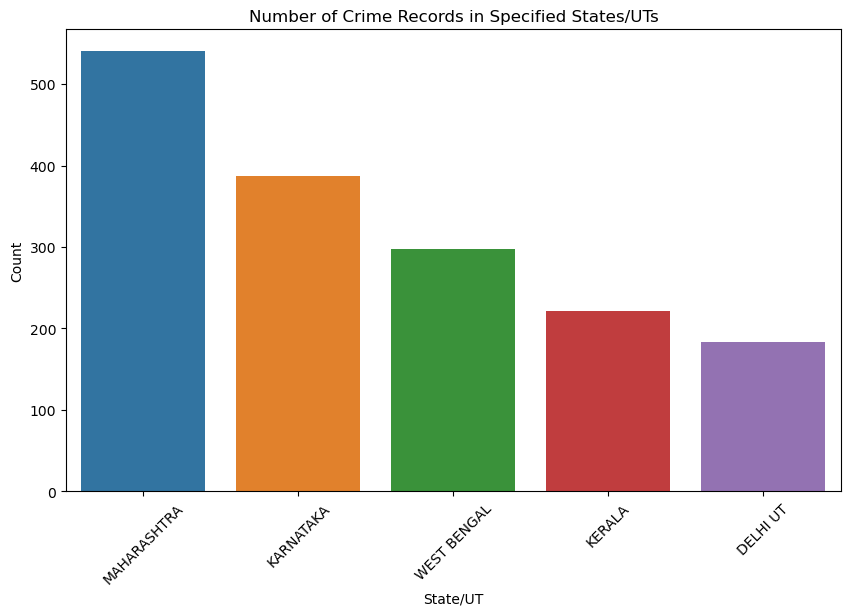

In [125]:
# Filter the DataFrame for the specified states/UTs
states = ['DELHI UT', 'KARNATAKA', 'KERALA', 'MAHARASHTRA', 'WEST BENGAL']
filtered_crimes = crimes[crimes['STATE/UT'].isin(states)]

# Now, visualize the data
# For example, let's create a bar plot showing the count of crimes in each state/UT

# Counting the occurrences/rows for each state/UT
state_counts = filtered_crimes['STATE/UT'].value_counts().reset_index()
state_counts.columns = ['STATE/UT', 'Count']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='STATE/UT', y='Count', data=state_counts)
plt.title('Number of Crime Records in Specified States/UTs')
plt.xlabel('State/UT')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.show()


In [126]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8609 entries, 0 to 9015
Data columns (total 34 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             8609 non-null   object
 1   DISTRICT                                             8609 non-null   object
 2   YEAR                                                 8609 non-null   int64 
 3   MURDER                                               8609 non-null   int64 
 4   ATTEMPT TO MURDER                                    8609 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            8609 non-null   int64 
 6   RAPE                                                 8609 non-null   int64 
 7   CUSTODIAL RAPE                                       8609 non-null   int64 
 8   OTHER RAPE                                           8609 non-null   int64 
 9   KI

In [127]:
# Filter the crimes DataFrame for rows where the STATE/UT is 'MAHARASHTRA'
maharashtra_crimes = crimes[crimes['STATE/UT'] == 'MAHARASHTRA']


create a bar graph showing the total IPC crimes over the years in Maharashtra. This will give us an insight into how total crimes have trended over time.

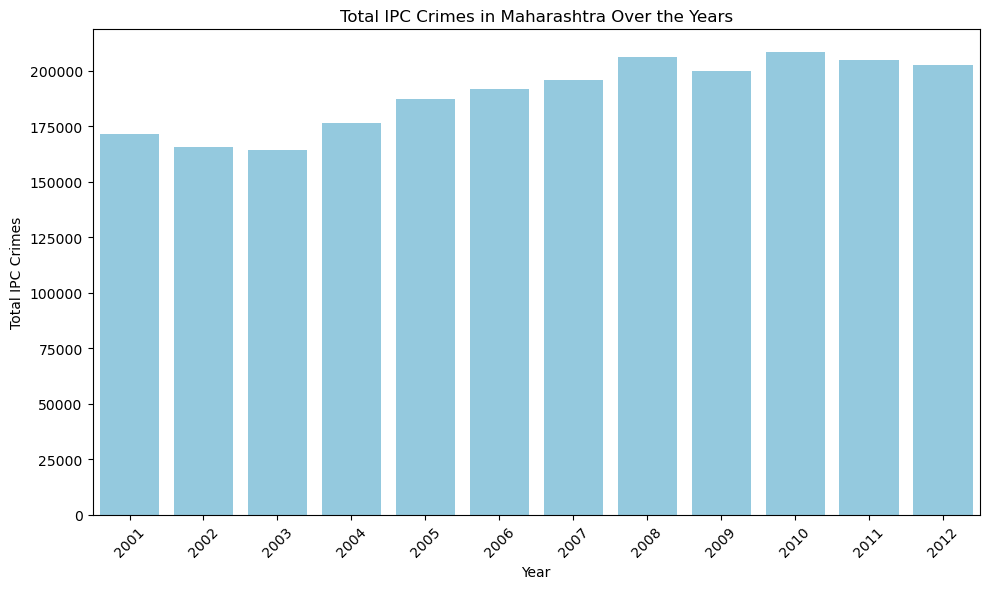

In [128]:
# Group the data by 'YEAR' and sum up all crimes for each year
yearly_crimes = maharashtra_crimes.groupby('YEAR')['TOTAL IPC CRIMES'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_crimes, x='YEAR', y='TOTAL IPC CRIMES', color='skyblue')

plt.title('Total IPC Crimes in Maharashtra Over the Years')
plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Graph shows in year 2008 and 2010 Total IPC Crimes were High.**

In [129]:
# Exclude non-crime columns
crime_columns = maharashtra_crimes.columns[3:-1]  # Assuming 'Area Type' is the last column and crimes start from 4th column

# Sum up the counts for each type of crime
crime_totals = maharashtra_crimes[crime_columns].sum().sort_values(ascending=False)


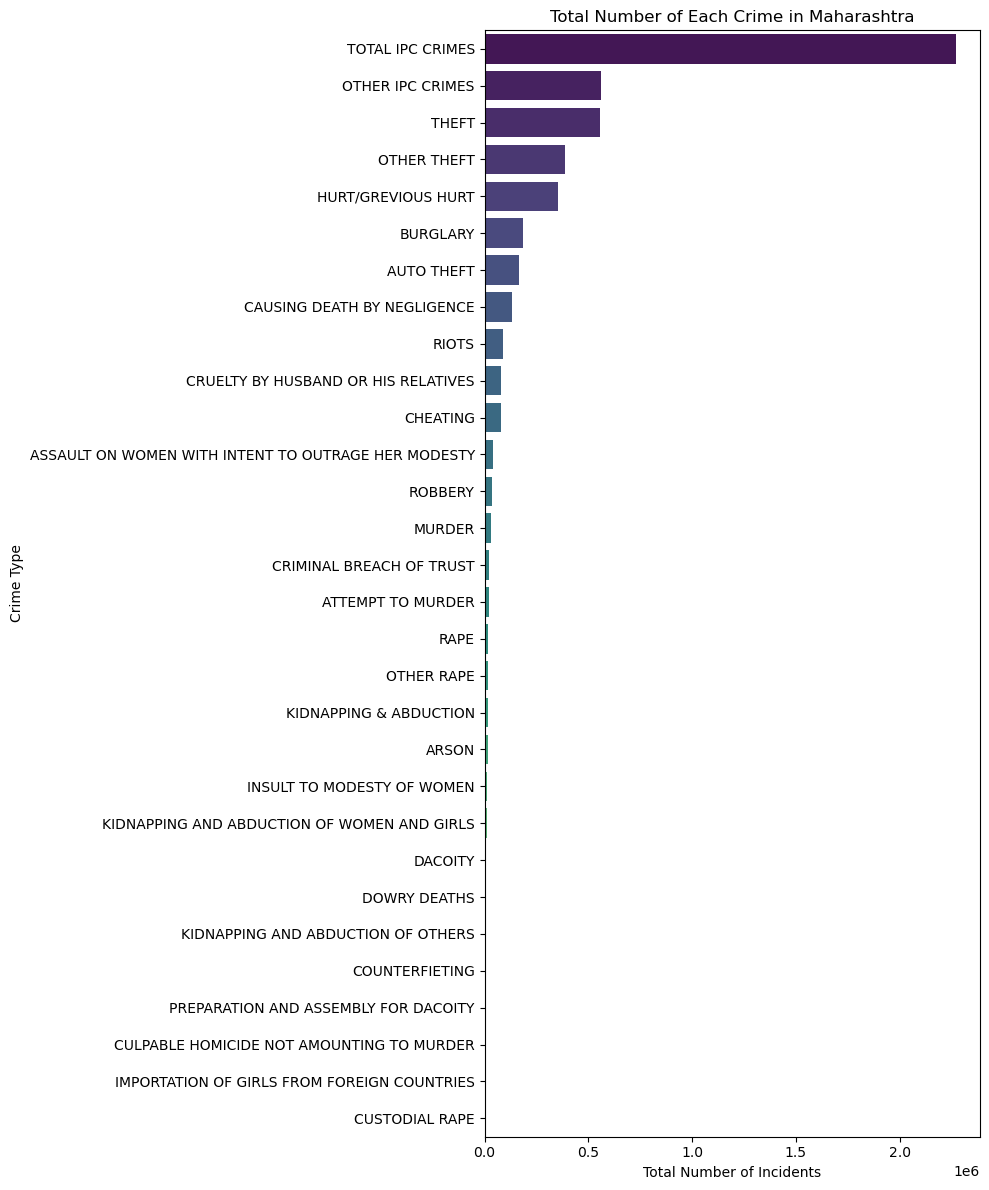

In [130]:
# Convert crime_totals to DataFrame for easier plotting
crime_totals_df = crime_totals.reset_index()
crime_totals_df.columns = ['Crime Type', 'Total']

# Plotting
plt.figure(figsize=(10, 12))
sns.barplot(data=crime_totals_df, y='Crime Type', x='Total', palette='viridis')

plt.title('Total Number of Each Crime in Maharashtra')
plt.xlabel('Total Number of Incidents')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()

**Graph shows in Maharashtra State more Crime happend in Theft, Other theft and grevious hurt.**
<br>**It should be in control to make state peaceful**

In [131]:
# Filter the crimes DataFrame for rows where the STATE/UT is 'KARNATAKA'
karnataka_crimes = crimes[crimes['STATE/UT'] == 'KARNATAKA']


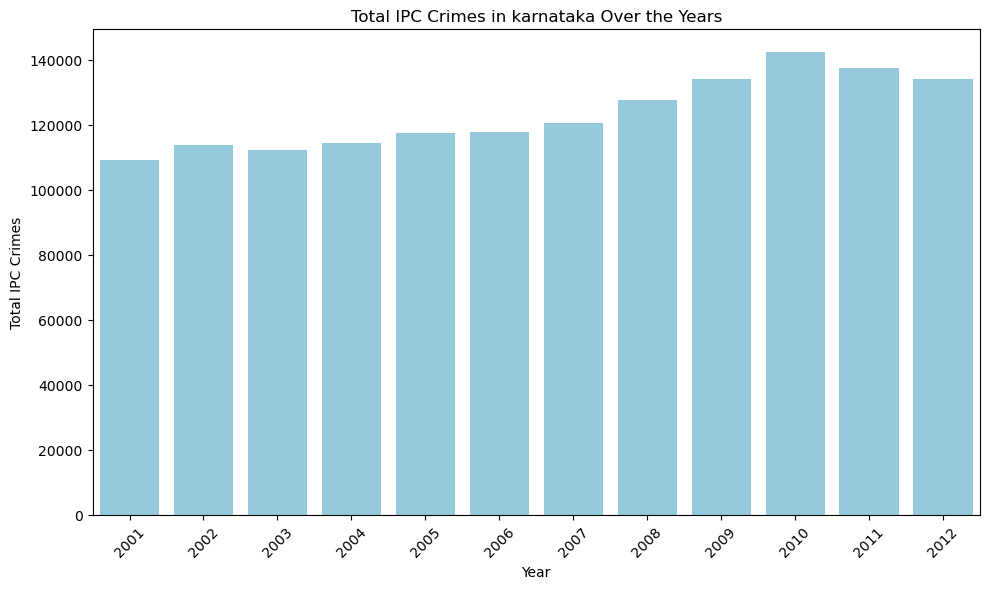

In [133]:
# Group the data by 'YEAR' and sum up all crimes for each year
yearly_crimes = karnataka_crimes.groupby('YEAR')['TOTAL IPC CRIMES'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_crimes, x='YEAR', y='TOTAL IPC CRIMES', color='skyblue')

plt.title('Total IPC Crimes in karnataka Over the Years')
plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Graph shows Total IPC Crimes Happend in th year 2010 then 2009 then 2011**

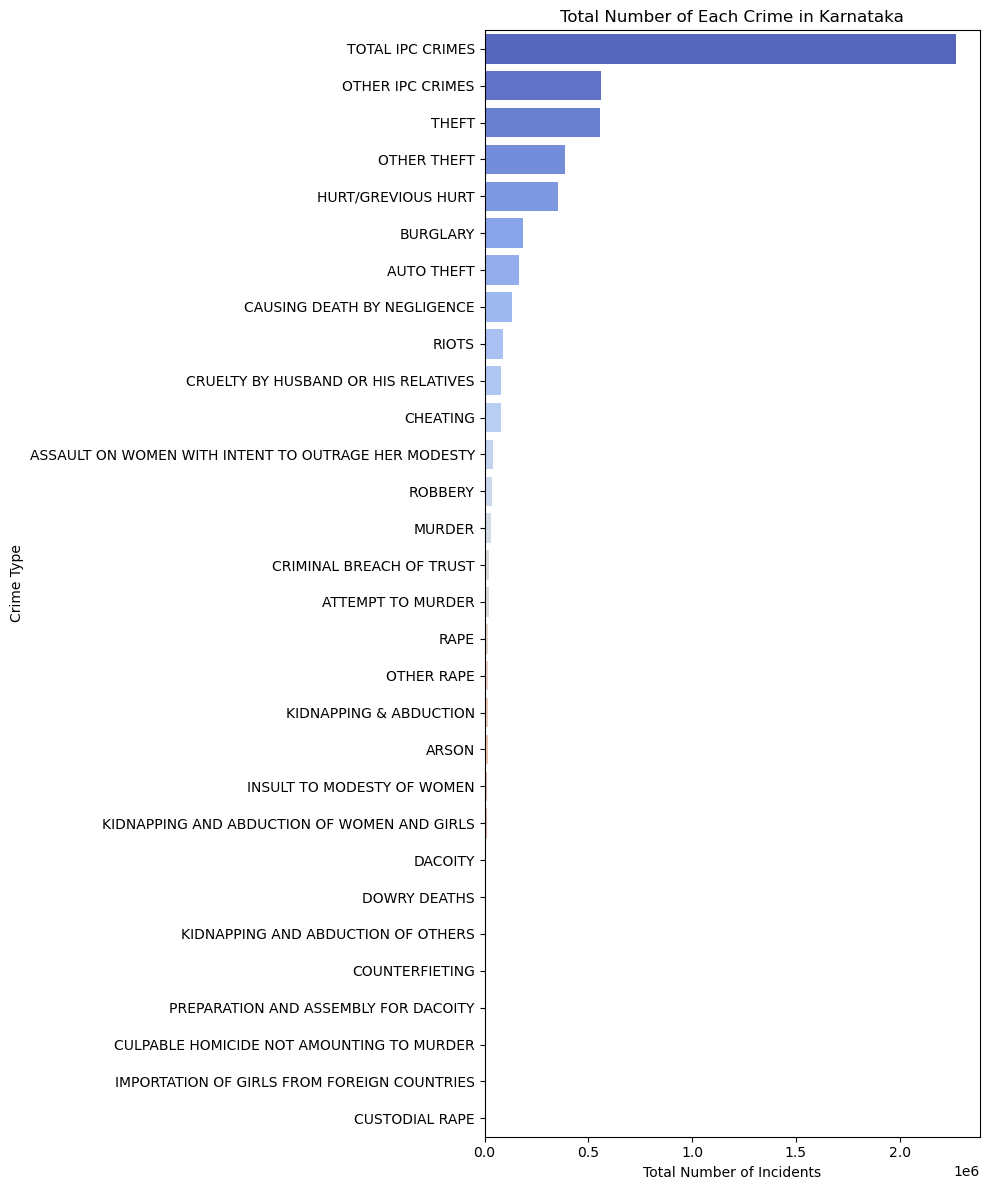

In [134]:
# Convert crime_totals to DataFrame for easier plotting
crime_totals_df = crime_totals.reset_index()
crime_totals_df.columns = ['Crime Type', 'Total']

# Plotting
plt.figure(figsize=(10, 12))
sns.barplot(data=crime_totals_df, y='Crime Type', x='Total', palette='coolwarm')

plt.title('Total Number of Each Crime in Karnataka')
plt.xlabel('Total Number of Incidents')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()

**Graph shows in Karnataka State more Crime happend in Theft, Other theft and grevious hurt.**
**<br>It should be in control to make state peaceful or at least Moderate**

In [135]:
# Filter the crimes DataFrame for rows where the STATE/UT is 'KERALA'
kerala_crimes = crimes[crimes['STATE/UT'] == 'KERALA']


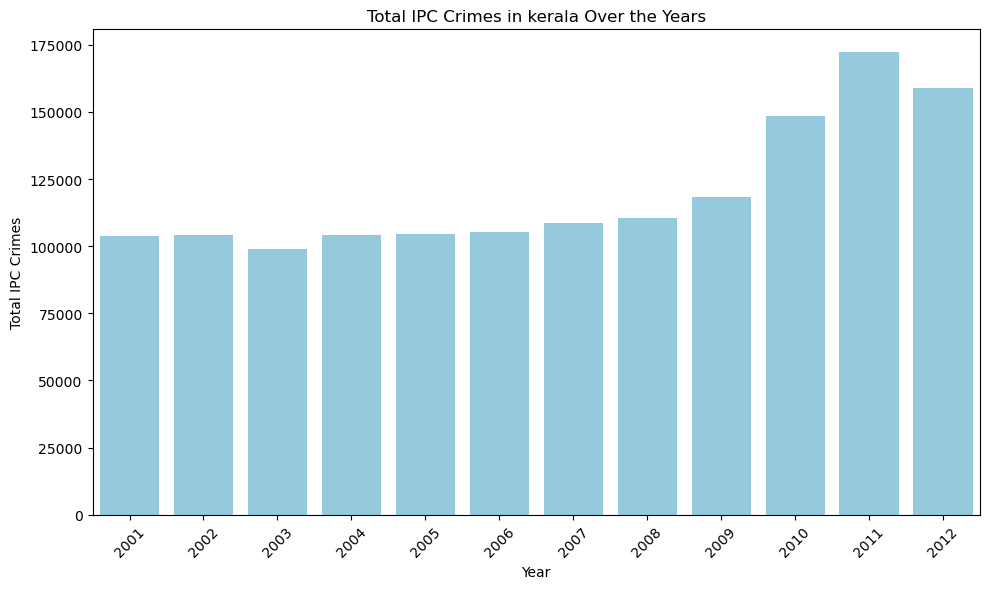

In [136]:
# Group the data by 'YEAR' and sum up all crimes for each year
yearly_crimes = kerala_crimes.groupby('YEAR')['TOTAL IPC CRIMES'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_crimes, x='YEAR', y='TOTAL IPC CRIMES', color='skyblue')

plt.title('Total IPC Crimes in kerala Over the Years')
plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**The Total IPC Crimes happened in the year 2011 then 2012 then 2010**

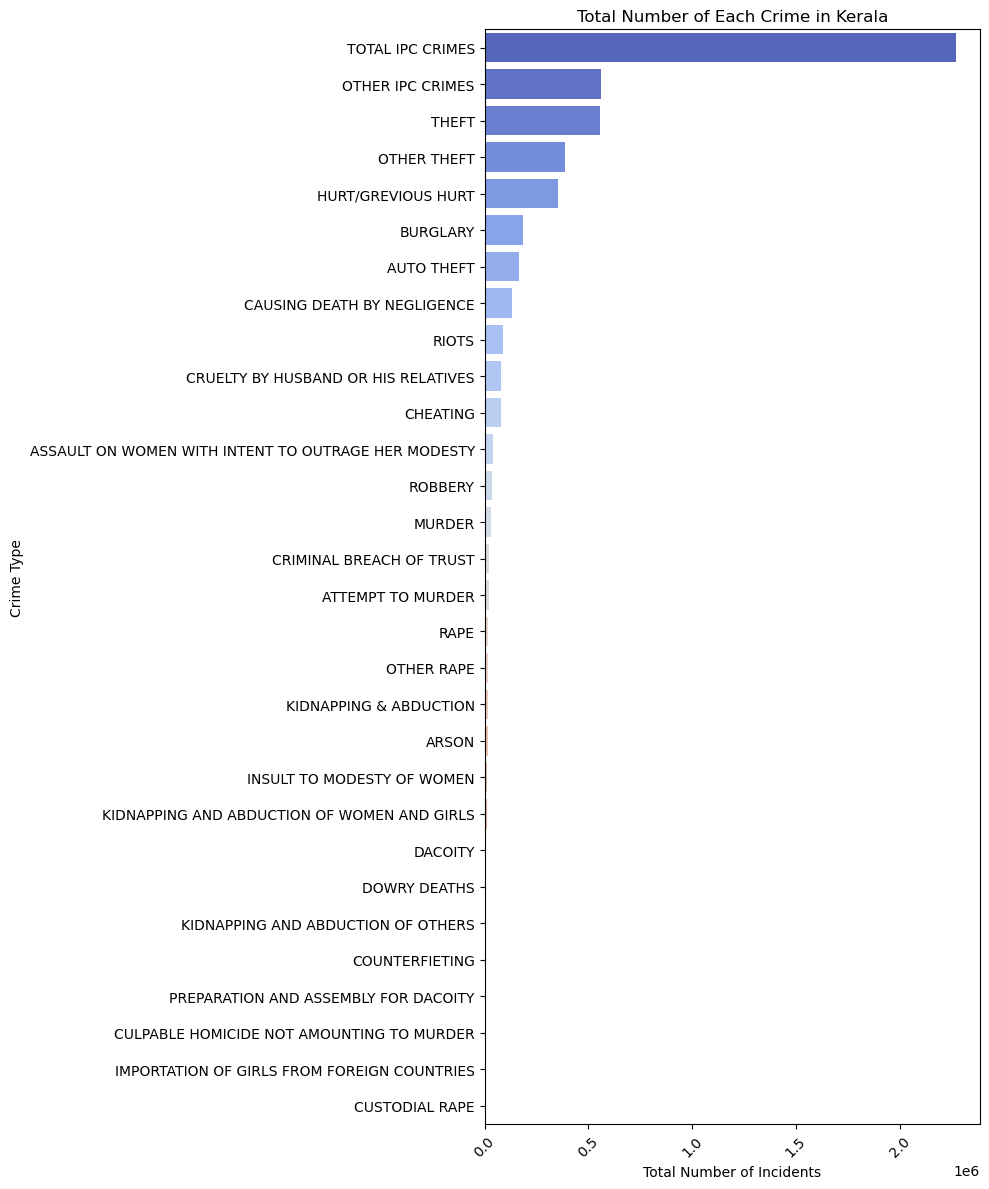

In [137]:
# Convert crime_totals to DataFrame for easier plotting
crime_totals_df = crime_totals.reset_index()
crime_totals_df.columns = ['Crime Type', 'Total']

# Plotting
plt.figure(figsize=(10, 12))
sns.barplot(data=crime_totals_df, y='Crime Type', x='Total', palette='coolwarm')

plt.title('Total Number of Each Crime in Kerala')
plt.xlabel('Total Number of Incidents')
plt.ylabel('Crime Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [166]:
women_crime = pd.read_csv("C:\\Users\\gupta\\Downloads\\India_Crime - Copy\\India_Crime - Copy\\42_District_wise_crimes_committed_against_women_2001_2012.csv")

In [167]:
women_crime.head(10)
women_crime

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [193]:
# Drop rows where the 'DISTRICT' column value is 'TOTAL'
women_crimes= women_crime[women_crime['DISTRICT'] != 'TOTAL']

# Display the first few rows of the filtered DataFrame to confirm 'TOTAL' rows are dropped
print(women_crimes.head())


         STATE/UT       DISTRICT  Year  Rape  Kidnapping and Abduction  \
0  ANDHRA PRADESH       ADILABAD  2001    50                        30   
1  ANDHRA PRADESH      ANANTAPUR  2001    23                        30   
2  ANDHRA PRADESH       CHITTOOR  2001    27                        34   
3  ANDHRA PRADESH       CUDDAPAH  2001    20                        20   
4  ANDHRA PRADESH  EAST GODAVARI  2001    23                        26   

   Dowry Deaths  Assault on women with intent to outrage her modesty  \
0            16                                                149     
1             7                                                118     
2            14                                                112     
3            17                                                126     
4            12                                                109     

   Insult to modesty of Women  Cruelty by Husband or his Relatives  \
0                          34                       

Text(0.5, 1.0, 'No of Cases vs Year')

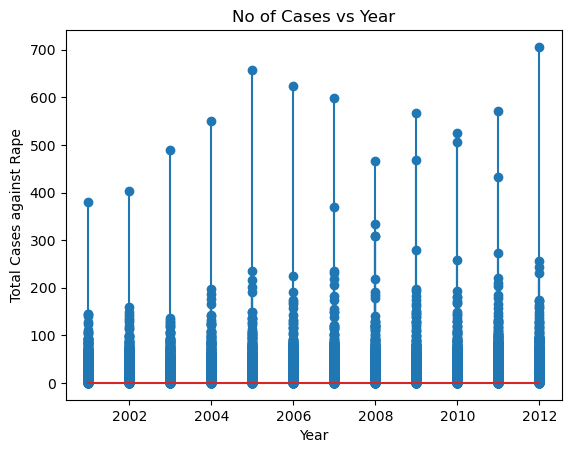

In [194]:
plt.stem( women_crimes.Year,women_crimes.Rape)
plt.ylabel('Total Cases against Rape')   
plt.xlabel('Year')
plt.title('No of Cases vs Year')

In [196]:
g1= pd.DataFrame(women_crimes.groupby(['STATE/UT'])['Rape'].sum().reset_index())
g1.columns=['STATE/UT','Rape']
g1

,STATE/UT,Rape
0,A & N ISLANDS,109
1,ANDHRA PRADESH,13479
2,ARUNACHAL PRADESH,500
3,ASSAM,16178
4,BIHAR,13124
5,CHANDIGARH,281
6,CHHATTISGARH,11838
7,D & N HAVELI,56
8,DAMAN & DIU,20
9,DELHI,12848


In [208]:
g2= pd.DataFrame(women_crimes.groupby(['STATE/UT'])['Kidnapping and Abduction'].sum().reset_index())
g2.columns=['STATE/UT','Kidnapping and Abduction']
g2

,STATE/UT,Kidnapping and Abduction
0,A & N ISLANDS,77
1,ANDHRA PRADESH,14936
2,ARUNACHAL PRADESH,558
3,ASSAM,22920
4,BIHAR,19389
5,CHANDIGARH,534
6,CHHATTISGARH,2630
7,D & N HAVELI,94
8,DAMAN & DIU,15
9,DELHI,31300


In [209]:
g3= pd.DataFrame(women_crimes.groupby(['STATE/UT'])['Dowry Deaths'].sum().reset_index())
g3.columns=['STATE/UT','Dowry Deaths']
g3

,STATE/UT,Dowry Deaths
0,A & N ISLANDS,6
1,ANDHRA PRADESH,6215
2,ARUNACHAL PRADESH,2
3,ASSAM,1276
4,BIHAR,13548
5,CHANDIGARH,42
6,CHHATTISGARH,1142
7,D & N HAVELI,1
8,DAMAN & DIU,3
9,DELHI,3164


In [210]:
g4= pd.DataFrame(women_crimes.groupby(['STATE/UT'])['Assault on women with intent to outrage her modesty'].sum().reset_index())
g4.columns=['STATE/UT','Assault on women with intent to outrage her modesty']
g4

,STATE/UT,Assault on women with intent to outrage her modesty
0,A & N ISLANDS,214
1,ANDHRA PRADESH,51999
2,ARUNACHAL PRADESH,784
3,ASSAM,13620
4,BIHAR,7576
5,CHANDIGARH,314
6,CHHATTISGARH,19165
7,D & N HAVELI,50
8,DAMAN & DIU,15
9,DELHI,15068


In [211]:
g5= pd.DataFrame(women_crimes.groupby(['STATE/UT'])['Insult to modesty of Women'].sum().reset_index())
g5.columns=['STATE/UT','Insult to modesty of Women']
g5

,STATE/UT,Insult to modesty of Women
0,A & N ISLANDS,43
1,ANDHRA PRADESH,36131
2,ARUNACHAL PRADESH,18
3,ASSAM,112
4,BIHAR,226
5,CHANDIGARH,143
6,CHHATTISGARH,1725
7,D & N HAVELI,4
8,DAMAN & DIU,2
9,DELHI,3374


In [212]:
g6= pd.DataFrame(women_crimes.groupby(['STATE/UT'])['Cruelty by Husband or his Relatives'].sum().reset_index())
g6.columns=['STATE/UT','Cruelty by Husband or his Relatives']
g6

,STATE/UT,Cruelty by Husband or his Relatives
0,A & N ISLANDS,121
1,ANDHRA PRADESH,119007
2,ARUNACHAL PRADESH,167
3,ASSAM,39388
4,BIHAR,25680
5,CHANDIGARH,807
6,CHHATTISGARH,9573
7,D & N HAVELI,38
8,DAMAN & DIU,35
9,DELHI,30422


In [213]:
g7= pd.DataFrame(women_crimes.groupby(['STATE/UT'])['Importation of Girls'].sum().reset_index())
g7.columns=['STATE/UT','Importation of Girls']
g7

,STATE/UT,Importation of Girls
0,A & N ISLANDS,0
1,ANDHRA PRADESH,17
2,ARUNACHAL PRADESH,0
3,ASSAM,8
4,BIHAR,440
5,CHANDIGARH,0
6,CHHATTISGARH,5
7,D & N HAVELI,0
8,DAMAN & DIU,0
9,DELHI,2


In [198]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# List all files in the current directory
print("Files in the current directory:", os.listdir('.'))


Current Working Directory: C:\Users\gupta
Files in the current directory: ['.anaconda', '.cache', '.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.ploomber', '2Temperature forcast project.ipynb', 'anaconda3', 'AppData', 'Application Data', 'Article Project.ipynb', 'Avacodo Project.ipynb', 'Avocado Dataset Analysis and ML Predictions (1).ipynb', 'Baseball Case Study Project ..ipynb', 'Baseball Case Study.ipynb', 'Capstone project phase 2.ipynb', 'Capstone Project Phase 3.ipynb', 'Capstone Project Phase 4.ipynb', 'clustered_crime_data.csv', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'EDA_ASBD.ipynb', 'EDA_ASBD_project.ipynb', 'Evaluation Project 2 HR Analytics Project- Understanding the Attrition in HR (1).ipynb', 'Evaluation Project 9 Temperature Forecast Project using ML.ipynb', 'Favorites', 'FR Census income.ipynb', 'Glass Identification project.ipynb', 'Global Power Plant Database.ipynb', 'Global Power Plant.ipynb', 'Grade Predi

In [200]:
!pip install geopandas

In [169]:
import collections
import matplotlib.pyplot as plt
!pip install pyyaml==5.4.1
import plotly.express as px
import time
!pip install geopandas

  Using cached PyYAML-5.4.1.tar.gz (175 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [54 lines of output]
  running egg_info
  writing lib3\PyYAML.egg-info\PKG-INFO
  writing dependency_links to lib3\PyYAML.egg-info\dependency_links.txt
  writing top-level names to lib3\PyYAML.egg-info\top_level.txt
  Traceback (most recent call last):
    File "C:\Users\gupta\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\gupta\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\gupta\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
      return hook(config_settings)
             ^^^^^^^^^^^^^^^^^^^^^
    Fil

In [170]:
from scipy import stats
import statistics
import geopandas as gpd

In [144]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     - 0 bytes ? 0:00:00
     - 81.8 kB 4.9 MB/s 0:00:00
     \ 81.8 kB 4.9 MB/s 0:00:00
     \ 81.8 kB 4.9 MB/s 0:00:00
     | 81.8 kB 4.9 MB/s 0:00:00
     | 81.8 kB 4.9 MB/s 0:00:00
     / 81.8 kB 4.9 MB/s 0:00:00
     / 81.8 kB 4.9 MB/s 0:00:00
     - 81.8 kB 4.9 MB/s 0:00:00
     - 81.8 kB 4.9 MB/s 0:00:00
     \ 81.8 kB 4.9 MB/s 0:00:00
     \ 81.8 kB 4.9 MB/s 0:00:00
     | 81.8 kB 4.9 MB/s 0:00:00
     | 81.8 kB 4.9 MB/s 0:00:00
     / 124.1 kB 193.1 kB/s 0:00:00
     / 425.8 kB 628.6 kB/s 0:00:00
     - 672.4 kB 930.4 kB/s 0:00:00
     - 936.3 kB 1.2 MB/s 0:00:00
     \ 1.3 MB 1.6 MB/s 0:00:00
     \ 1.6 MB 1.9 MB/s 0:00:00
     | 1.9 MB 2.2 MB/s 0:00:00
     | 2.3 MB 2.5 MB/s 0:00:00
     / 2.7 MB 2.7 MB/s 0:00:00
     / 3.0 MB 3.0 MB/s 0:00:01
     - 3.4 MB 3.2 MB/s 0:00:01
     - 3.8 MB 3.4 MB/s 0:00:01
     \ 4.1 MB 3.6 MB/s 0:00:01
     \ 4.5 MB 3.8 MB/s 0:00:01
     | 4.7 MB 3.8 MB/s 0:00:01
     | 5.1 MB 4.0 MB/s 0:00:01
     / 5.4 MB 4.1 MB/s 0:00:01
     / 5.7 MB 4.2 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.3 requires pydantic<2.0, but you have pydantic 2.6.4 which is incompatible.


In [145]:
!pip install MarkupSafe==2.0.1

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for MarkupSafe: filename=MarkupSafe-2.0.1-py3-none-any.whl size=9767 sha256=39c5597bb77e1c1cc893096c7baf31f0dddb6cfb6497238fc0dbf32ebf6d6e53
  Stored in directory: c:\users\gupta\appdata\local\pip\cache\wheels\ea\18\79\6266ea508b8164a77b95aa19534c77eb805f2878612c37efca
Successfully built MarkupSafe
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
werkzeug 2.2.3 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [171]:
# Let's prepare the data
wdata_for_clustering = women_crimes[['STATE/UT', 'DISTRICT', 'Year', 'Rape']].copy()

In [172]:
# Since clustering will be based on 'TOTAL IPC CRIMES', let's scale this feature
# Scaling is optional here as we have only one feature, but it's generally a good practice
scaler = StandardScaler()
wdata_for_clustering['Rape'] = scaler.fit_transform(wdata_for_clustering[['Rape']])


In [173]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
wdata_for_clustering['Cluster'] = kmeans.fit_predict(wdata_for_clustering[['Rape']])

In [174]:
# We will now label our clusters as requested
# First, find out which cluster numbers correspond to high, medium, and low crime rates
centroids_scaled = kmeans.cluster_centers_.flatten()
order = centroids_scaled.argsort()  # This gives us the order from lowest to highest
labels_map = {order[0]: 'Peaceful Areas', order[1]: 'Moderate Areas', order[2]: 'Sensitive Areas'}
wdata_for_clustering['Area Type'] = wdata_for_clustering['Cluster'].map(labels_map)

In [175]:
# Drop the 'TOTAL IPC CRIMES Scaled' and 'Cluster' as they are no longer needed for the analysis
#wdata_for_clustering.drop(['Rape', 'Cluster'], axis=1, inplace=True)

# Showing the DataFrame sorted by 'Area Type' for clearer analysis
wsorted_data = wdata_for_clustering.sort_values(by=['Area Type', 'STATE/UT', 'DISTRICT'])

# Display or save the sorted data
print(wsorted_data.head(50))  # Adjust the number to display as needed

# If you wish to save this data to a CSV for easier viewing or sharing
wsorted_data.to_csv('wclustered_crime_data.csv', index=False)

# The result is a DataFrame where each district is categorized into one of the three area types


            STATE/UT        DISTRICT  Year      Rape  Cluster       Area Type
0     ANDHRA PRADESH        ADILABAD  2001  0.590080        0  Moderate Areas
2163  ANDHRA PRADESH        ADILABAD  2004  0.590080        0  Moderate Areas
2892  ANDHRA PRADESH        ADILABAD  2005  0.672508        0  Moderate Areas
3625  ANDHRA PRADESH        ADILABAD  2006  0.974743        0  Moderate Areas
4365  ANDHRA PRADESH        ADILABAD  2007  0.480176        0  Moderate Areas
5108  ANDHRA PRADESH        ADILABAD  2008  0.590080        0  Moderate Areas
5869  ANDHRA PRADESH        ADILABAD  2009  1.057170        0  Moderate Areas
6636  ANDHRA PRADESH        ADILABAD  2010  0.535128        0  Moderate Areas
7415  ANDHRA PRADESH        ADILABAD  2011  1.524261        0  Moderate Areas
8206  ANDHRA PRADESH        ADILABAD  2012  1.634165        0  Moderate Areas
3629  ANDHRA PRADESH       CYBERABAD  2006  0.864839        0  Moderate Areas
4369  ANDHRA PRADESH       CYBERABAD  2007  0.452700        0  M

In [176]:
# Filter the DataFrame to include only rows where 'Area Type' is 'Sensitive Areas'
wsensitive_areas_df = wsorted_data[wsorted_data['Area Type'] == 'Sensitive Areas']

# Display the filtered DataFrame
print(wsensitive_areas_df)


         STATE/UT           DISTRICT  Year       Rape  Cluster  \
700         DELHI     DELHI UT TOTAL  2001   9.684611        2   
1418        DELHI     DELHI UT TOTAL  2002  10.289081        2   
2147        DELHI     DELHI UT TOTAL  2003  12.679487        2   
2876        DELHI     DELHI UT TOTAL  2004  14.355518        2   
3609        DELHI     DELHI UT TOTAL  2005  17.295442        2   
4348        DELHI     DELHI UT TOTAL  2006  16.333785        2   
5090        DELHI     DELHI UT TOTAL  2007  15.646887        2   
5849        DELHI     DELHI UT TOTAL  2008  12.020065        2   
6616        DELHI     DELHI UT TOTAL  2009  12.102493        2   
7395        DELHI     DELHI UT TOTAL  2010  13.146578        2   
8186        DELHI     DELHI UT TOTAL  2011  14.932513        2   
8997        DELHI     DELHI UT TOTAL  2012  18.614287        2   
5812  WEST BENGAL  24 PARGANAS SOUTH  2008   7.678869        2   
6579  WEST BENGAL  24 PARGANAS SOUTH  2009   6.909543        2   
5823  WEST

In [177]:
# Filter the DataFrame to include only rows where 'Area Type' is 'Sensitive Areas'
wpeaceful_areas_df = wsorted_data[wsorted_data['Area Type'] == 'Peaceful Areas']

# Display the filtered DataFrame
print(wpeaceful_areas_df)

           STATE/UT         DISTRICT  Year      Rape  Cluster       Area Type
5080  A & N ISLANDS  A and N ISLANDS  2007 -0.701289        1  Peaceful Areas
689   A & N ISLANDS          ANDAMAN  2001 -0.701289        1  Peaceful Areas
1407  A & N ISLANDS          ANDAMAN  2002 -0.756241        1  Peaceful Areas
2136  A & N ISLANDS          ANDAMAN  2003 -0.728765        1  Peaceful Areas
2865  A & N ISLANDS          ANDAMAN  2004 -0.508957        1  Peaceful Areas
...             ...              ...   ...       ...      ...             ...
8979    WEST BENGAL  SILIGURI G.R.P.  2012 -0.783717        1  Peaceful Areas
8980    WEST BENGAL      SILIGURI_PC  2012 -0.206722        1  Peaceful Areas
687     WEST BENGAL   UTTAR DINAJPUR  2001  0.068037        1  Peaceful Areas
1405    WEST BENGAL   UTTAR DINAJPUR  2002 -0.234198        1  Peaceful Areas
2134    WEST BENGAL   UTTAR DINAJPUR  2003 -0.124294        1  Peaceful Areas

[6873 rows x 6 columns]


In [178]:
# Filter the DataFrame to include only rows where 'Area Type' is 'Sensitive Areas'
wmoderate_areas_df = wsorted_data[wsorted_data['Area Type'] == 'Moderate Areas']

# Display the filtered DataFrame
print(wmoderate_areas_df)

            STATE/UT        DISTRICT  Year      Rape  Cluster       Area Type
0     ANDHRA PRADESH        ADILABAD  2001  0.590080        0  Moderate Areas
2163  ANDHRA PRADESH        ADILABAD  2004  0.590080        0  Moderate Areas
2892  ANDHRA PRADESH        ADILABAD  2005  0.672508        0  Moderate Areas
3625  ANDHRA PRADESH        ADILABAD  2006  0.974743        0  Moderate Areas
4365  ANDHRA PRADESH        ADILABAD  2007  0.480176        0  Moderate Areas
...              ...             ...   ...       ...      ...             ...
5834     WEST BENGAL  UTTAR DINAJPUR  2008  1.359406        0  Moderate Areas
6601     WEST BENGAL  UTTAR DINAJPUR  2009  1.414357        0  Moderate Areas
7380     WEST BENGAL  UTTAR DINAJPUR  2010  2.788154        0  Moderate Areas
8171     WEST BENGAL  UTTAR DINAJPUR  2011  2.678250        0  Moderate Areas
8981     WEST BENGAL  UTTAR DINAJPUR  2012  1.744069        0  Moderate Areas

[1716 rows x 6 columns]


In [179]:
print(wsensitive_areas_df[['STATE/UT', 'DISTRICT', 'Rape']])

         STATE/UT           DISTRICT       Rape
700         DELHI     DELHI UT TOTAL   9.684611
1418        DELHI     DELHI UT TOTAL  10.289081
2147        DELHI     DELHI UT TOTAL  12.679487
2876        DELHI     DELHI UT TOTAL  14.355518
3609        DELHI     DELHI UT TOTAL  17.295442
4348        DELHI     DELHI UT TOTAL  16.333785
5090        DELHI     DELHI UT TOTAL  15.646887
5849        DELHI     DELHI UT TOTAL  12.020065
6616        DELHI     DELHI UT TOTAL  12.102493
7395        DELHI     DELHI UT TOTAL  13.146578
8186        DELHI     DELHI UT TOTAL  14.932513
8997        DELHI     DELHI UT TOTAL  18.614287
5812  WEST BENGAL  24 PARGANAS SOUTH   7.678869
6579  WEST BENGAL  24 PARGANAS SOUTH   6.909543
5823  WEST BENGAL         JALPAIGURI   8.393243
5071  WEST BENGAL        MURSHIDABAD   9.354900
5827  WEST BENGAL        MURSHIDABAD   7.678869
6594  WEST BENGAL        MURSHIDABAD  14.822609
7373  WEST BENGAL        MURSHIDABAD  13.668620
8164  WEST BENGAL        MURSHIDABAD  11

In [180]:
# Get distinct state names from the filtered DataFrame
wdistinct_states = wsensitive_areas_df['STATE/UT'].unique()

# Print the distinct state names
print(wdistinct_states)

['DELHI' 'WEST BENGAL']


In [181]:
# Get distinct districts names from the filtered DataFrame
wdistinct_districts = wsensitive_areas_df['DISTRICT'].unique()

# Print the distinct districts names
print(wdistinct_districts)

['DELHI UT TOTAL' '24 PARGANAS SOUTH' 'JALPAIGURI' 'MURSHIDABAD']


In [182]:
# Filter the DataFrame to include only rows where 'Area Type' is 'peaceful Areas'
wpeaceful_areas_df = wsorted_data[wsorted_data['Area Type'] == 'Peaceful Areas']

# Display the filtered DataFrame
print(wpeaceful_areas_df)

           STATE/UT         DISTRICT  Year      Rape  Cluster       Area Type
5080  A & N ISLANDS  A and N ISLANDS  2007 -0.701289        1  Peaceful Areas
689   A & N ISLANDS          ANDAMAN  2001 -0.701289        1  Peaceful Areas
1407  A & N ISLANDS          ANDAMAN  2002 -0.756241        1  Peaceful Areas
2136  A & N ISLANDS          ANDAMAN  2003 -0.728765        1  Peaceful Areas
2865  A & N ISLANDS          ANDAMAN  2004 -0.508957        1  Peaceful Areas
...             ...              ...   ...       ...      ...             ...
8979    WEST BENGAL  SILIGURI G.R.P.  2012 -0.783717        1  Peaceful Areas
8980    WEST BENGAL      SILIGURI_PC  2012 -0.206722        1  Peaceful Areas
687     WEST BENGAL   UTTAR DINAJPUR  2001  0.068037        1  Peaceful Areas
1405    WEST BENGAL   UTTAR DINAJPUR  2002 -0.234198        1  Peaceful Areas
2134    WEST BENGAL   UTTAR DINAJPUR  2003 -0.124294        1  Peaceful Areas

[6873 rows x 6 columns]


In [183]:
# Get distinct state names from the filtered DataFrame
wpdistinct_states = wpeaceful_areas_df['STATE/UT'].unique()

# Print the distinct state names
print(wpdistinct_states)

['A & N ISLANDS' 'ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR'
 'CHANDIGARH' 'CHHATTISGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'LAKSHADWEEP' 'MADHYA PRADESH' 'MAHARASHTRA'
 'MANIPUR' 'MEGHALAYA' 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUDUCHERRY' 'PUNJAB'
 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU' 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND'
 'WEST BENGAL']


In [187]:
# Get distinct district names from the filtered DataFrame
wpdistinct_district = wpeaceful_areas_df['DISTRICT'].unique()

# Print the distinct state names
print(wpdistinct_district)

['A and N ISLANDS' 'ANDAMAN' 'CAR' 'NICOBAR' 'NORTH' 'SOUTH' 'ADILABAD'
 'ANANTAPUR' 'CHITTOOR' 'CUDDAPAH' 'CYBERABAD' 'EAST GODAVARI'
 'GUNTAKAL RLY.' 'GUNTUR' 'GUNTUR URBAN' 'HYDERABAD CITY' 'KARIMNAGAR'
 'KHAMMAM' 'KRISHNA' 'KURNOOL' 'MEDAK' 'NALGONDA' 'NELLORE' 'NIZAMABAD'
 'PRAKASHAM' 'RAJAHMUNDRY' 'RANGA REDDY' 'SECUNDERABAD RLY.' 'SRIKAKULAM'
 'TIRUPATHI URBAN' 'VIJAYAWADA' 'VIJAYAWADA CITY' 'VIJAYAWADA RLY.'
 'VISAKHA RURAL' 'VISAKHAPATNAM' 'VIZIANAGARAM' 'WARANGAL'
 'WARANGAL URBAN' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'K/KUMEY'
 'KAMENG EAST' 'KAMENG WEST' 'LOHIT' 'PAPUM PARE' 'RURAL' 'SIANG EAST'
 'SIANG UPPER' 'SIANG WEST' 'SUBANSIRI LOWER' 'SUBANSIRI UPPER' 'TAWANG'
 'TIRAP' 'UPPER DIBANG VALLEY' 'BAKSA' 'BARPETA' 'BASKA' 'BIEO'
 'BONGAIGAON' 'C.I.D.' 'CHIRANG' 'DARRANG' 'DHEMAJI' 'DHUBRI' 'DIBRUGARH'
 'G.R.P.' 'GOALPARA' 'GOLAGHAT' 'GUWAHATI CITY' 'HAILAKANDI' 'HAMREN'
 'JORHAT' 'KAMRUP' 'KARBI ANGLONG' 'KARIMGANJ' 'KOKRAJHAR' 'LAKHIMPUR'
 'MORIGAON' 'N.C.HILLS' 'NALBARI' 

In [185]:
# Get distinct state names from the filtered DataFrame
wsdistinct_states = wsensitive_areas_df['STATE/UT'].unique()

# Print the distinct state names
print(wsdistinct_states)

['DELHI' 'WEST BENGAL']


In [188]:
# Get distinct state names from the filtered DataFrame
wsdistinct_district = wsensitive_areas_df['DISTRICT'].unique()

# Print the distinct state names
print(wsdistinct_district)

['DELHI UT TOTAL' '24 PARGANAS SOUTH' 'JALPAIGURI' 'MURSHIDABAD']


In [189]:
# Get distinct state names from the filtered DataFrame
wmdistinct_states = wmoderate_areas_df['STATE/UT'].unique()

# Print the distinct state names
print(wmdistinct_states)

['ANDHRA PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'DELHI' 'GUJARAT'
 'HARYANA' 'JHARKHAND' 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA'
 'MEGHALAYA' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'TAMIL NADU' 'TRIPURA'
 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL']


In [190]:
# Get distinct state names from the filtered DataFrame
wmdistinct_states = wmoderate_areas_df['DISTRICT'].unique()

# Print the distinct state names
print(wmdistinct_states)

['ADILABAD' 'CYBERABAD' 'EAST GODAVARI' 'GUNTUR' 'HYDERABAD CITY'
 'KARIMNAGAR' 'KHAMMAM' 'KRISHNA' 'KURNOOL' 'MAHABOOBNAGAR' 'MEDAK'
 'NALGONDA' 'NELLORE' 'NIZAMABAD' 'RANGA REDDY' 'VIJAYAWADA CITY'
 'VISAKHAPATNAM' 'VIZIANAGARAM' 'WARANGAL' 'WEST GODAVARI' 'BARPETA'
 'BONGAIGAON' 'CACHAR' 'DARRANG' 'DHEMAJI' 'DHUBRI' 'DIBRUGARH' 'GOALPARA'
 'GOLAGHAT' 'GUWAHATI CITY' 'HAILAKANDI' 'JORHAT' 'KAMRUP' 'KARIMGANJ'
 'KOKRAJHAR' 'LAKHIMPUR' 'MORIGAON' 'NAGAON' 'SIBSAGAR' 'SONITPUR'
 'TINSUKIA' 'ARARIA' 'BANKA' 'BETTIAH' 'BHAGALPUR' 'DARBHANGA' 'GAYA'
 'JAMUI' 'KATIHAR' 'KISHANGANJ' 'MADHUBANI' 'MUZAFFARPUR' 'PATNA' 'PURNEA'
 'SAMASTIPUR' 'SARAN' 'SITAMARHI' 'SUPAUL' 'VAISHALI' 'BALODA BAZAR'
 'BALRAMPUR' 'BILASPUR' 'DURG' 'JAGDALPUR' 'JANJGIR' 'JASHPUR' 'KORBA'
 'KORIYA' 'RAIGARH' 'RAIPUR' 'RAJNANDGAON' 'SARGUJA' 'SURAJPUR' 'EAST'
 'NORTH EAST' 'NORTH WEST' 'NORTH-EAST' 'NORTH-WEST' 'OUTER' 'SOUTH'
 'SOUTH WEST' 'SOUTH-EAST' 'SOUTH-WEST' 'WEST' 'AHMEDABAD COMMR.'
 'PALANPUR' 'FARIDABAD' 'GU

In [192]:
# You might want to see the distribution of 'Area Type'
print(wsorted_data['Area Type'].value_counts())

Area Type
Peaceful Areas     6873
Moderate Areas     1716
Sensitive Areas      20
Name: count, dtype: int64


**Sensitive States are: 'DELHI' 'WEST BENGAL'**

**Sensitive Districts are: 'DELHI UT TOTAL' '24 PARGANAS SOUTH' 'JALPAIGURI' 'MURSHIDABAD'**

<br>Delhi :- Rape, Kidnapping and Abduction are highest
<br>West Bengal :-Rape crimes are higher than Delhi
<br>Uttar  Pradesh :UP has higher kidnappings than Delhi,Rajasthan, Assam and West Begal.
<br>Lakshdweep, Diu & daman having lowest Rapes and Kidnapping.
<br>Nagaland & Lakshdweep dont have any dowry case.
<br>Dadra Nagar Haweli, Arunachal pradesh,daman diu, Manipur, Mizoram and Sikkim having lowest cases of Dowery.
<br>Bihar & Uttar Pradesh having highest number of Dowry cases.
<br>Andra Pradesh, Maharastra, Madhya Pradesh, kerala, Karnataka,Rajasthan, Uttar Pradesh and West Bangal Having more cases of Asssault.